# Moisture and Density Residue Correlation to Splice
The samples for this study were taken from the shipboard residues for moisture and density (MAD) samples. Moisture and density sampling was performed on sediment from Hole A. Thus, samples do not always fall on the splice. Here, we use shipboard logs (predominantly magnetic susceptibility, but also RGB and NGR) to correlate the MAD samples from Hole A onto the splice. 

In [1109]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [1110]:
data_path='/Users/danielbabin/Documents/GitHub/U1474_XRF_Data_Report/Data/'
ppl_path='/Users/danielbabin/Documents/GitHub/P-Pl_Natal_Valley/Tables/'

In [1111]:
MAD=pd.read_csv(data_path+'moisture&density.csv').dropna()
MAD['#']=np.arange(1,len(MAD)+1)
MAD.set_index('#',inplace=True)
MAD.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

# Records
## Magnetic Susceptibility

In [1112]:
MS=pd.read_csv(data_path+'magnetic_susceptibility.csv',low_memory=False)
MS['CoreLabel']=MS['Site']+MS['Hole']+'_'+MS['Core'].map(str)
MS.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

## NGR

In [1113]:
ngr=pd.read_csv(data_path+'ngr.csv',low_memory=False)
ngr['CoreLabel']=ngr['Site']+ngr['Hole']+'_'+ngr['Core'].map(str)
ngr.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

## RGB

In [1114]:
rgb=pd.read_csv(data_path+'rgb.csv',low_memory=False)
rgb['CoreLabel']=rgb['Site']+rgb['Hole']+'_'+rgb['Core'].map(str)
rgb.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

# Import Splice Info

In [1115]:
splice=pd.read_csv(data_path+'U1474_splice_construction.csv').iloc[0:57]
splice['CoreLabel']=(splice['Site']+splice['Hole']+'_'+splice['Core'].map(str))

section_list=pd.read_csv(data_path+'U1474_section_list.csv')
section_list['SectionLabel']=(section_list['Site']+section_list['Hole']+'_'+
                              section_list['Core'].map(str)+section_list['Type']+section_list['Sect'].map(str))
section_list.rename(columns={'Top depth CCSF-361-U1474-ABDEF-20160220 (m)':'Top Depth CCSF (m)',
                            'Bottom depth CCSF-361-U1474-ABDEF-20160220 (m)':'Bottom Depth CCSF (m)'},inplace=True)

# Make Splices
MS

In [1116]:
for i,core in enumerate(splice.CoreLabel):
    deeper=MS.loc[MS['CoreLabel']==core,'Depth (m CCSF)']>splice.loc[i,'Top depth CCSF (m)']
    shallower=MS.loc[MS['CoreLabel']==core,'Depth (m CCSF)']<splice.loc[i,'Bottom depth CCSF (m)']
    MS.loc[MS['CoreLabel']==core,'In Splice']=deeper&shallower
MS_splice=MS[MS['In Splice']==True].copy()
MS_splice.set_index('Depth (m CCSF)',inplace=True,drop=False)
MS_splice.sort_index(inplace=True)

NGR

In [1117]:
for i,core in enumerate(splice.CoreLabel):
    deeper=ngr.loc[ngr['CoreLabel']==core,'Depth (m CCSF)']>splice.loc[i,'Top depth CCSF (m)']
    shallower=ngr.loc[ngr['CoreLabel']==core,'Depth (m CCSF)']<splice.loc[i,'Bottom depth CCSF (m)']
    ngr.loc[ngr['CoreLabel']==core,'In Splice']=deeper&shallower
ngr_splice=ngr[ngr['In Splice']==True].copy()
ngr_splice.set_index('Depth (m CCSF)',inplace=True,drop=False)
ngr_splice.sort_index(inplace=True)
ngr_splice.drop_duplicates(inplace=True)

RGB

In [1118]:
for i,core in enumerate(splice.CoreLabel):
    deeper=rgb.loc[rgb['CoreLabel']==core,'Depth (m CCSF)']>splice.loc[i,'Top depth CCSF (m)']
    shallower=rgb.loc[rgb['CoreLabel']==core,'Depth (m CCSF)']<splice.loc[i,'Bottom depth CCSF (m)']
    rgb.loc[rgb['CoreLabel']==core,'In Splice']=deeper&shallower
rgb_splice=rgb[rgb['In Splice']==True].copy()
rgb_splice.set_index('Depth (m CCSF)',inplace=True,drop=False)
rgb_splice.sort_index(inplace=True)
rgb_splice.drop_duplicates(inplace=True)

# View

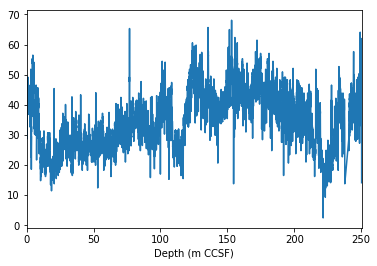

In [1119]:
MS_splice['Magnetic susceptibility (instr. units)'].plot()

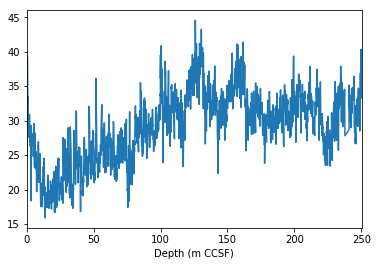

In [1120]:
ngr_splice['NGR total counts (cps)'].plot()

# Compare MAD Samples to Splice Record
MS

In [1121]:
MSA=MS[MS['Hole']=='A'].copy()
MSA.set_index('Depth CSF-A (m)',inplace=True,drop=False)
MSA.sort_index(inplace=True)

MS_spliceA=MS_splice.loc[MS_splice['Hole']=='A']
MS_spliceA_CSFA=MS_spliceA.set_index('Depth CSF-A (m)',drop=False)
MS_spliceA_CCSF=MS_spliceA.set_index('Depth (m CCSF)',drop=False)

MADA=MAD[MAD['Hole']=='A'].copy()

NGR

In [1122]:
ngrA=ngr[ngr['Hole']=='A'].copy()
ngrA.set_index('Depth CSF-A (m)',inplace=True,drop=False)
ngrA.sort_index(inplace=True)

ngr_spliceA=ngr_splice.loc[ngr_splice['Hole']=='A']
ngr_spliceA_CSFA=ngr_spliceA.set_index('Depth CSF-A (m)',drop=False)
ngr_spliceA_CCSF=ngr_spliceA.set_index('Depth (m CCSF)',drop=False)

RGB

In [1416]:
rgbA=rgb[rgb['Hole']=='A'].iloc[1:].copy()
rgbA.set_index('Depth CSF-A (m)',inplace=True,drop=False)
rgbA=rgbA[~rgbA.index.duplicated()]
rgbA.sort_index(inplace=True)

rgb_spliceA=rgb_splice.loc[rgb_splice['Hole']=='A'].dropna()
rgb_spliceA=rgb_spliceA[~rgb_spliceA.index.duplicated()]
rgb_spliceA.sort_index(inplace=True)


rgb_spliceA_CSFA=rgb_spliceA.set_index('Depth CSF-A (m)',drop=False)
rgb_spliceA_CCSF=rgb_spliceA.set_index('Depth (m CCSF)',drop=False)

## MAD Samples Hole A
Here is a table of all of the MAD samples from Hole A

In [1124]:
MADA.loc[[65,71,72,73]][['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'A/W',
                                                    'Offset (cm)','Depth CSF-A (m)', 'Depth (m CCSF)']]

Exp   Site Hole  Core Type  Sect A/W  Offset (cm)  Depth CSF-A (m)  \
#                                                                        
65  361  U1474    A    22    H     2   W        102.0           197.92   
71  361  U1474    A    24    H     4   W        110.0           219.97   
72  361  U1474    A    25    H     2   W        102.0           224.51   
73  361  U1474    A    25    H     4   W        102.0           227.52   

    Depth (m CCSF)  
#                   
65         216.915  
71         239.154  
72         244.048  
73         247.058

In [1125]:
MADA=MAD[MAD['Hole']=='A'].copy()
metadata=MADA.iloc[:62][['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'A/W',
                'Offset (cm)','Depth CSF-A (m)', 'Depth (m CCSF)']].copy()
extra=MADA.loc[[65,71,72,73]][['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'A/W',
                               'Offset (cm)','Depth CSF-A (m)', 'Depth (m CCSF)']].copy()
metadata=pd.concat([metadata,extra],axis=0)
metadata['#']=metadata.index
metadata['ID']='DB'+metadata['#'].astype(str).str.zfill(2)
metadata.drop('#',axis=1,inplace=True)

# Correlation
Here we go, sample by sample, using stratigraphic correlation to tie each MAD sample to its splice depth. The top panel is always in the CSF-A, the Hole depth, and the bottom panel is the Splice depth. When Hole A is appearing in the splice, it is colored orange. In the top panel, the green line represents where the MAD sample was taken. In the bottom panel, the green line represents how it was correlated. 

In [1126]:
metadata['Splice Correlation Depth (m CCSF)']=np.nan
metadata['Source']=np.nan

d='Splice Correlation Depth (m CCSF)'
sc='Source'
ba='Babin et al., 2020a'
bb='This Study'

In [1127]:
metadata['Correlation Quality']=np.nan
q='Correlation Quality'

### Appraising Quality:
* 5 = In the splice
* 4 = Very Good Correlation
* 3 = Good Correlation
* 2 = Questionable
* 1 = Likely Compromised

### 1. 361	U1474	A	1	H	1	W	92.0	0.920

In [1128]:
%matplotlib inline

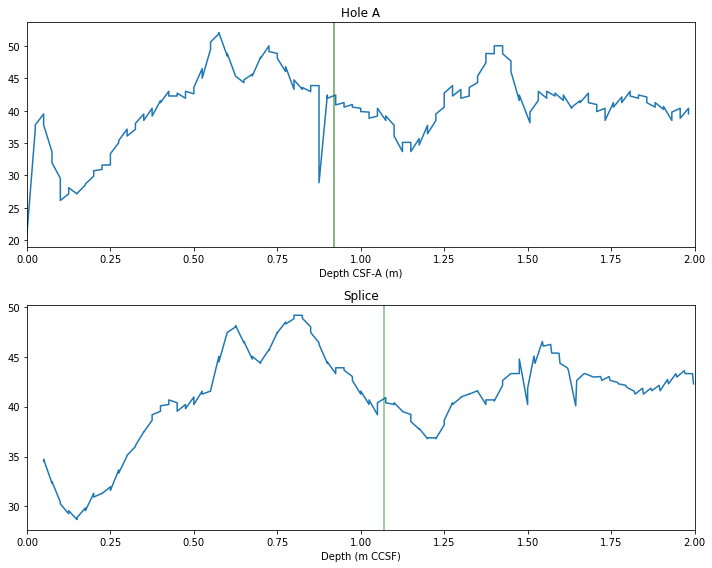

In [1129]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=0
x2=2

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(.92,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(1.07,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = .977

In [1131]:
metadata.loc[1,[d,sc,q]]=[1.07,ba,4]

### 2. 361	U1474	A	1	H	3	W	57.0	3.570

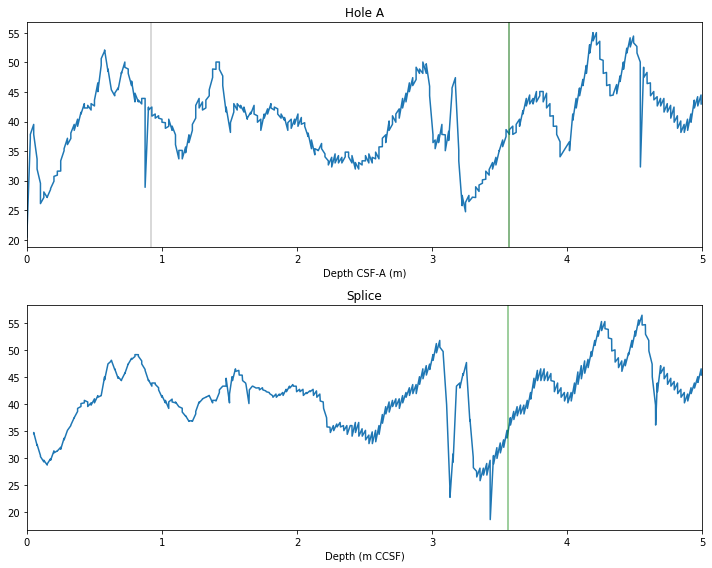

In [1302]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=0
x2=5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(3.570,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(3.56,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 3.6

In [1303]:
metadata.loc[2,[d,sc,q]]=3.56,bb,4

### 3. 361	U1474	A	2	H	1	W	129.0	6.690

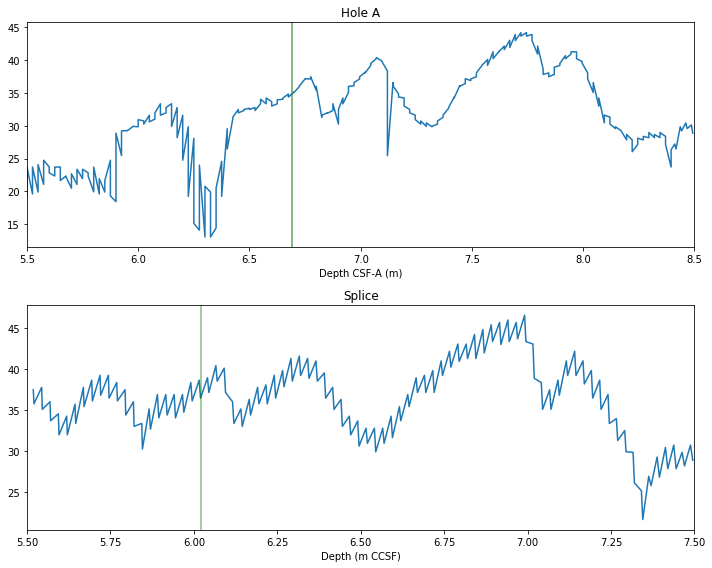

In [1135]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=5.5
x2=8.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(6.69,c='green',alpha=.5)

x1=5.5
x2=7.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(6.02,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 6.02

In [1137]:
metadata.loc[3,[d,sc,q]]=6.02,ba,4

### 4. 361	U1474	A	2	H	3	W	51.0	8.910

In [1396]:
ngr.columns

Index(['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'Offset (cm)',
       'Depth CSF-A (m)', 'Depth (m CCSF)', 'NGR total counts (cps)',
       'Error (cps)', 'Relative Error', 'Timestamp (UTC)', 'Instrument',
       'Text ID', 'Test No.', 'Comments', 'CoreLabel', 'In Splice'],
      dtype='object')

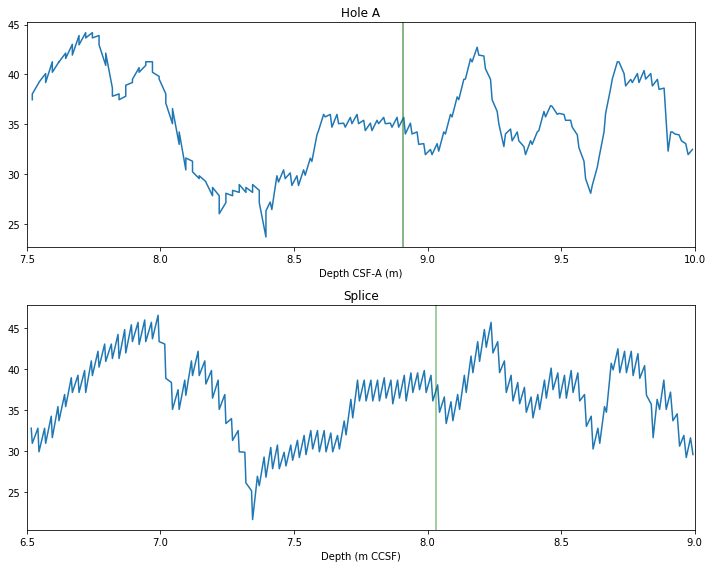

In [1430]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=7.5
x2=10

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(8.910,c='green',alpha=.5)

x1=6.5
x2=9

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(8.03,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 8

In [1431]:
metadata.loc[4,[d,sc,q]]=8.03,bb,4

### 5. 361	U1474	A	2	H	5	W	20.0	11.600

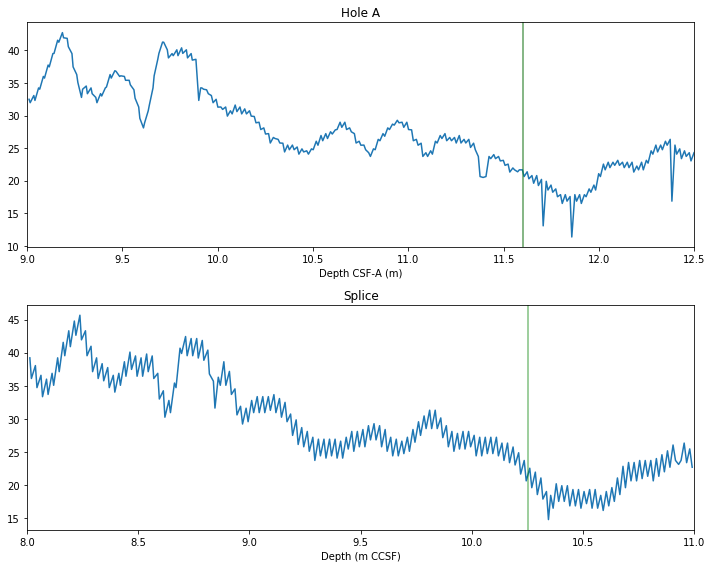

In [1139]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=9
x2=12.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(11.6,c='green',alpha=.5)

x1=8
x2=11

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(10.25,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 10.25

In [1140]:
metadata.loc[5,[d,sc,q]]=10.25,ba,3

### 6.	361	U1474	A	2	H	7	W	22.5	14.335

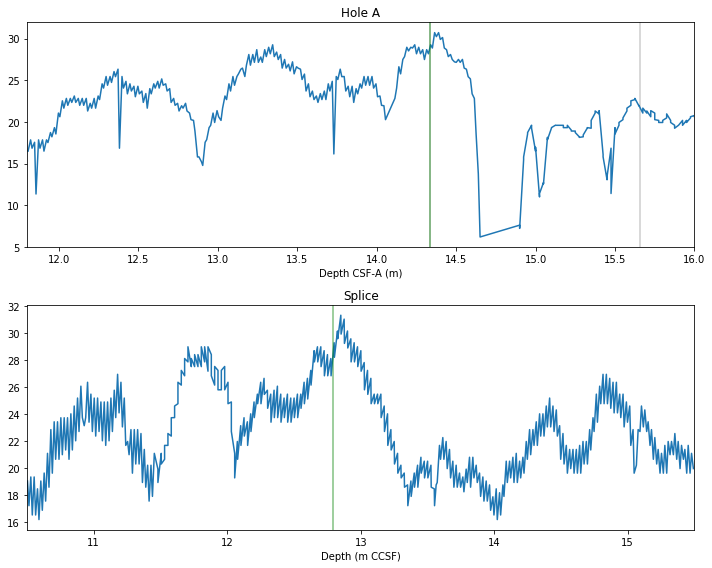

In [1141]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=11.8
x2=16

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(14.335,c='green',alpha=.5)

x1=10.5
x2=15.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(12.79,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 12.596

In [1142]:
metadata.loc[6,[d,sc,q]]=12.79,bb,3

### 7. 361	U1474	A	3	H	1	W	76.0	15.660

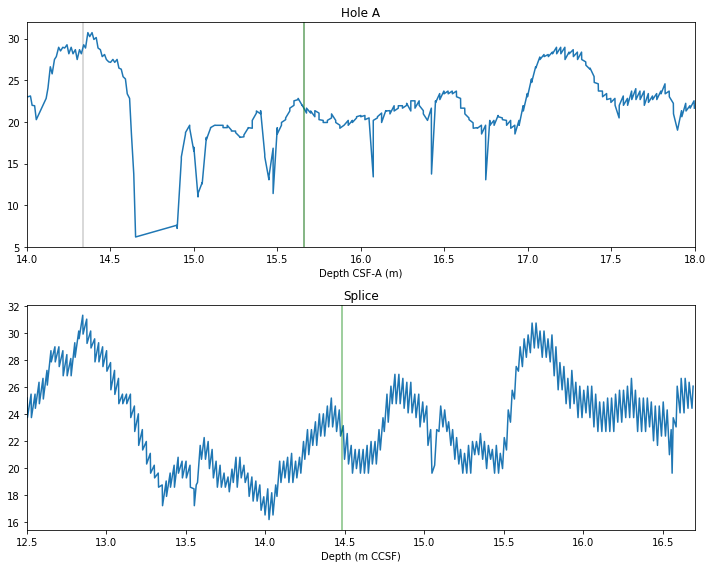

In [1367]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=14
x2=18

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(15.66,c='green',alpha=.5)

x1=12.5
x2=16.7

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(14.48,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 14.48

In [1368]:
metadata.loc[7,[d,sc,q]]=14.48,bb,3

### 8. 361	U1474	A	3	H	3	W	76	18.66

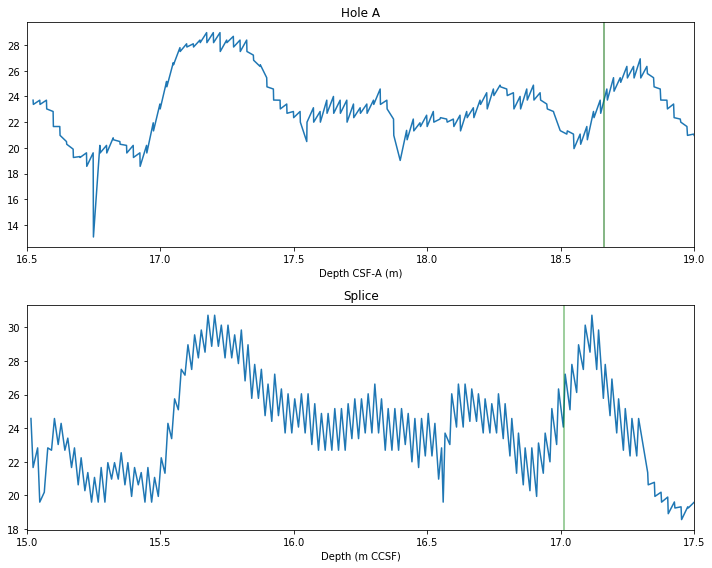

In [1145]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=16.5
x2=19

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(18.66,c='green',alpha=.5)

x1=15
x2=17.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(17.010,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 17.010

In [1146]:
metadata.loc[8,[d,sc,q]]=17.010,ba,4

### 9. 361	U1474	A	3	H	5	W	76	21.66

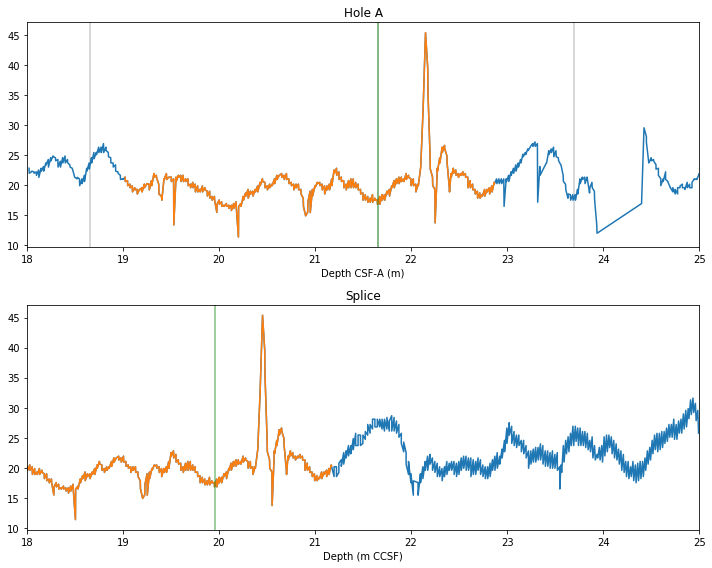

In [1147]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=18
x2=25

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(21.66,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(19.963,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 19.963

In [1149]:
metadata.loc[9,[d,sc,q]]=19.963,ba,5

### 10. 361	U1474	A	3	H	7	W	30.0	23.700	

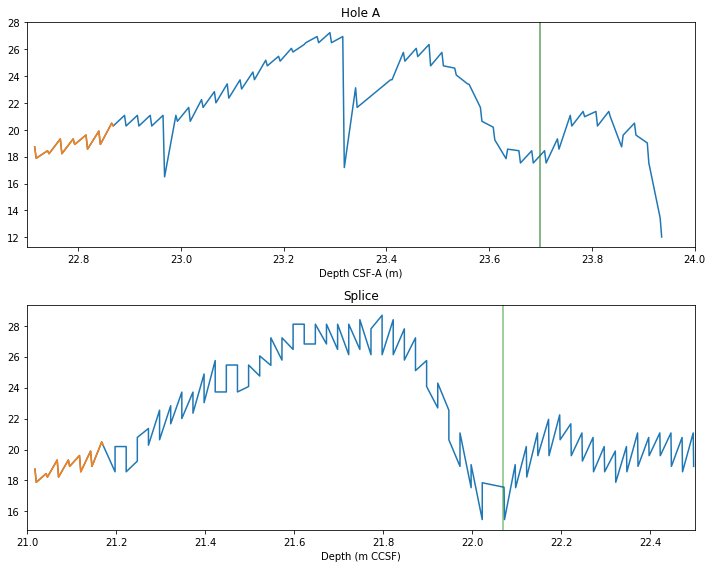

In [1312]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=22.7
x2=24

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(23.7,c='green',alpha=.5)

x1=21
x2=22.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(22.07,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 22.06

In [1313]:
metadata.loc[10,[d,sc,q]]=22.07,bb,4

### 11.	361	U1474	A	4	H	2	A	84.0	26.740

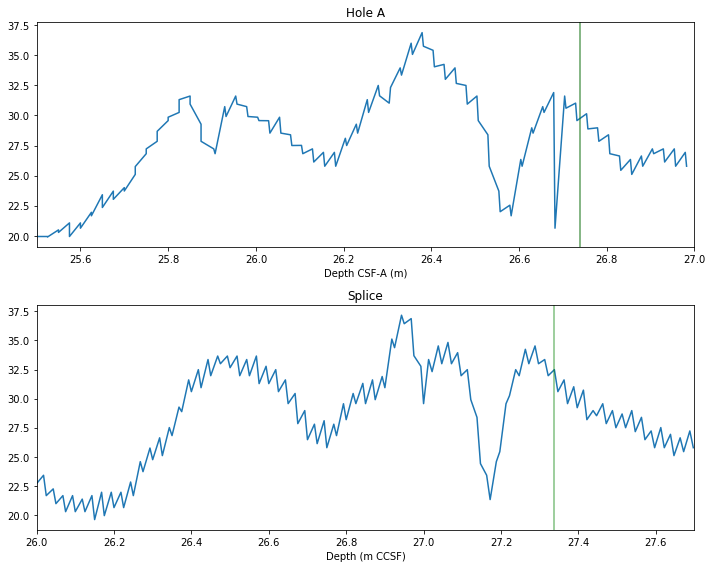

In [1152]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=25.5
x2=27

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(26.740,c='green',alpha=.5)

x1=26
x2=27.7

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(27.336,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 27.336

In [1153]:
n=11
metadata.loc[n,[d,sc,q]]=27.336,bb,4

### 12. 361	U1474	A	4	H	4	W	113	30.03

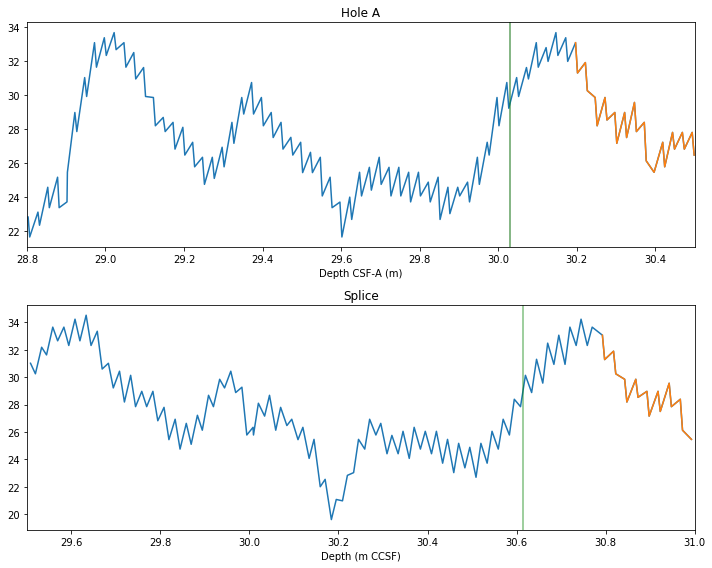

In [1154]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=28.8
x2=30.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(30.03,c='green',alpha=.5)

x1=29.5
x2=31

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(30.614,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 30.614

In [1155]:
n=12
metadata.loc[12,[d,sc,q]]=30.614,ba,4

### 13.	361	U1474	A	4	H	7	W	33.0	33.730
### &
### 14. 361	U1474	A	5	H	1	W	84	34.74

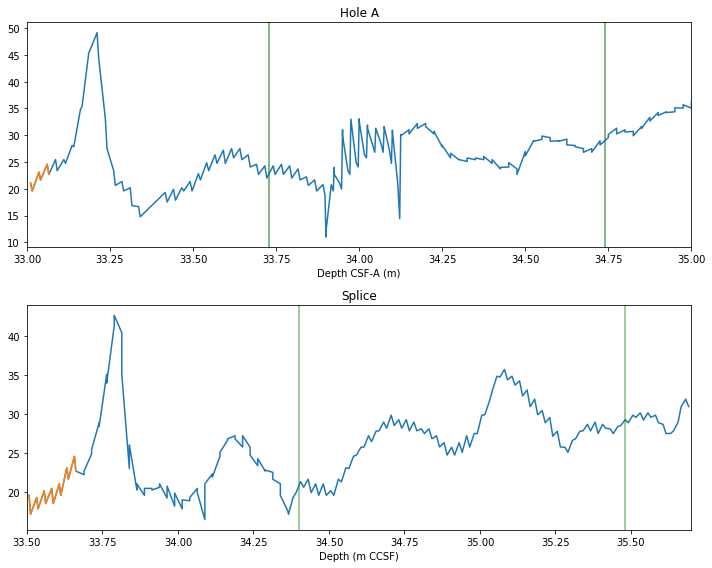

In [1380]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=33
x2=35

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(33.73,c='green',alpha=.5)
ax.axvline(34.74,c='green',alpha=.5)

x1=33.5
x2=35.7

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(34.4,c='green',alpha=.5)
ax.axvline(35.48,c='green',alpha=.5)

plt.tight_layout()

Splice Depths = 34.26 and 35.33

In [1382]:
n=13
metadata.loc[n,[d,sc,q]]=34.4,bb,3

In [1383]:
n=14
# metadata.loc[n,[d,sc]]=35.33,bb
metadata.loc[n,[d,sc,q]]=35.48,bb,3

### 15.	361	U1474	A	5	H	3	W	84.0	37.740

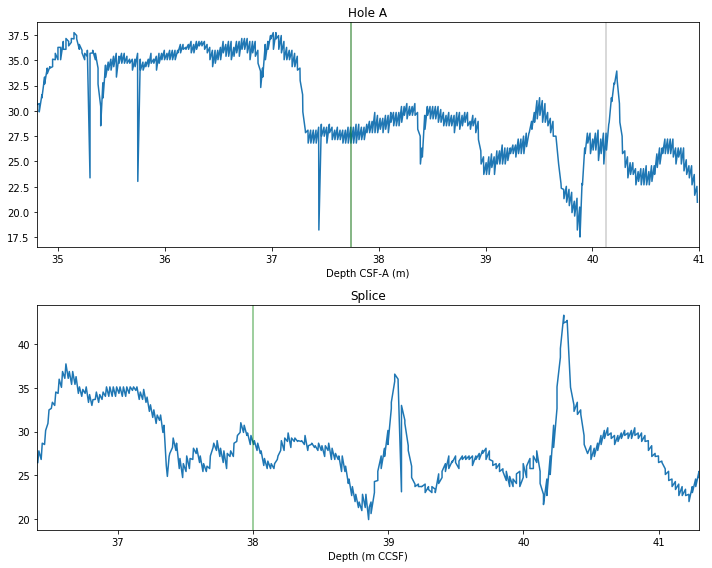

In [1159]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=34.8
x2=41

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(37.74,c='green',alpha=.5)

x1=36.4
x2=41.3

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(38,c='green',alpha=.5)

plt.tight_layout()

I think this samples is actually unsalvagable. Best guess below 37.5 and above 39

In [1160]:
n=15
metadata.loc[n,[d,sc,q]]=38,bb,1

### 16.	361	U1474	A	5	H	5	W	23.0	40.130

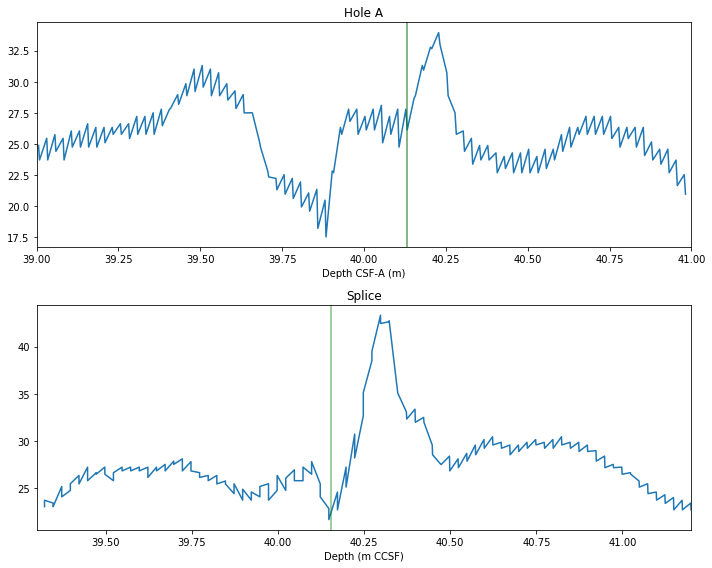

In [1161]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=39
x2=41

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(40.130,c='green',alpha=.5)

x1=39.3
x2=41.2

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(40.154,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 40.154

In [1162]:
n=16
metadata.loc[n,[d,sc,q]]=40.154,bb,2

### 17. 361	U1474	A	6	H	2	W	77	45.67

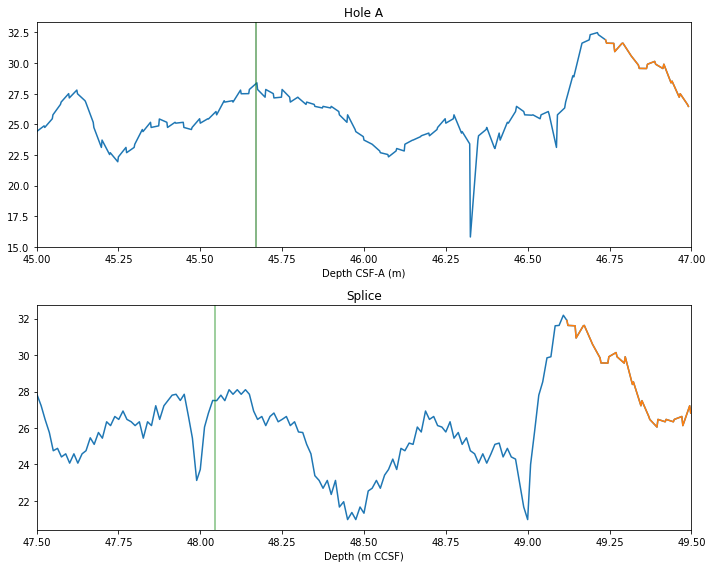

In [1163]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=45
x2=47

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(45.67,c='green',alpha=.5)

x1=47.5
x2=49.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(48.044,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 48.044

In [1164]:
n=17
metadata.loc[n,[d,sc,q]]=48.044,ba,3

### 18. 361	U1474	A	6	H	5	W	84	50.24

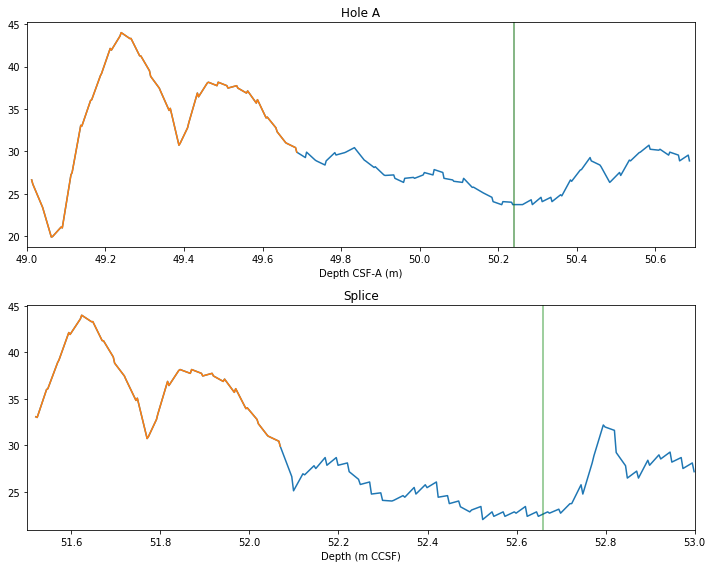

In [1386]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=49
x2=50.7

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(50.24,c='green',alpha=.5)

x1=51.5
x2=53

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(52.66,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 52.66

In [1387]:
n=18
metadata.loc[n,[d,sc,q]]=52.66,ba,4

### 19.	361	U1474	A	6	H	7	W	54.0	52.940

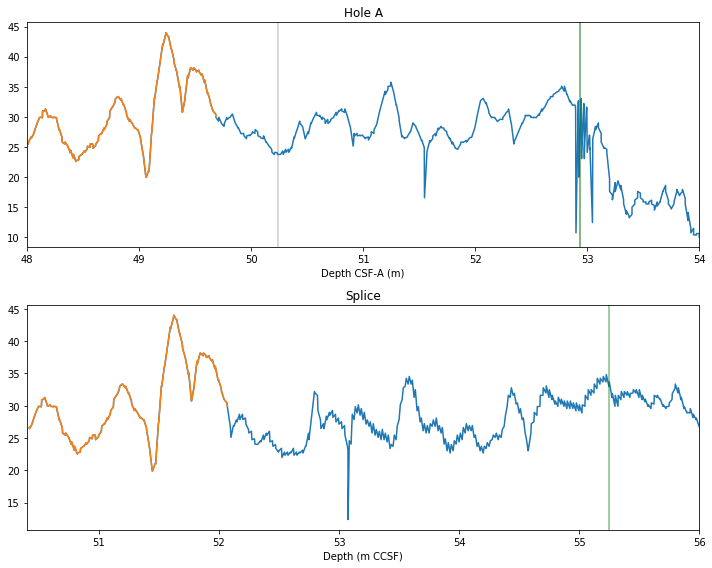

In [1168]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=48
x2=54

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(52.940,c='green',alpha=.5)

x1=50.4
x2=56

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(55.25,c='green',alpha=.5)

plt.tight_layout()

Probably compromised. Best Depth = 55.35

In [1169]:
n=19
metadata.loc[n,[d,sc,q]]=55.35,bb,2

### 20.	361	U1474	A	7	H	3	W	54.0	56.440

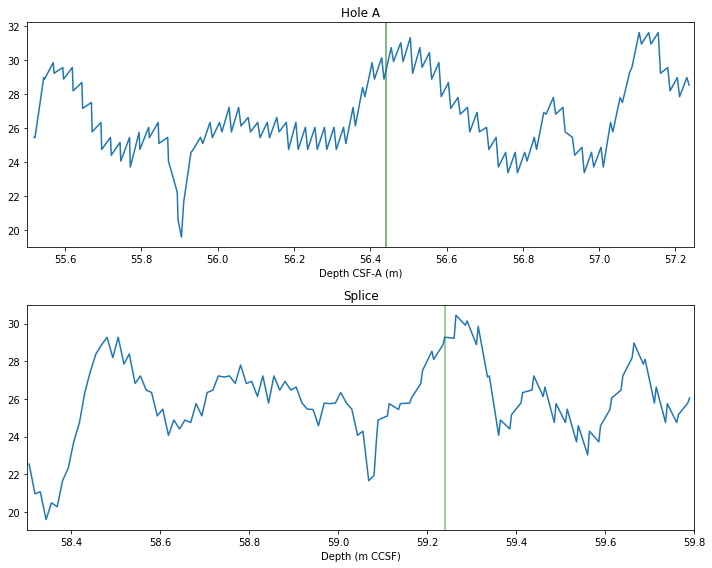

In [1170]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=55.5
x2=57.25

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(56.440,c='green',alpha=.5)

x1=58.3
x2=59.8

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(59.24,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 59.24

In [1171]:
n=20
metadata.loc[n,[d,sc,q]]=59.24,bb,3

### 21.	361	U1474	A	7	H	5	W	93.5	59.835	62.448

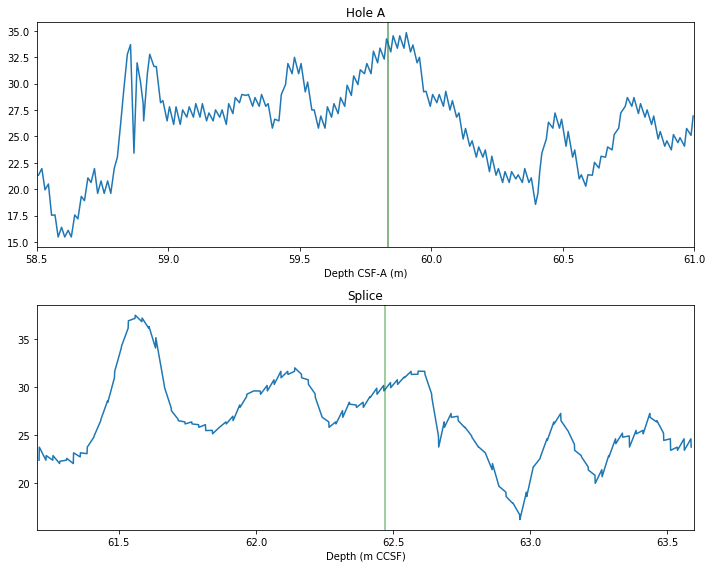

In [1321]:
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=58.5
x2=61

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(59.835,c='green',alpha=.5)

x1=61.2
x2=63.6

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(62.47,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 62.47

In [1322]:
n=21
metadata.loc[n,[d,sc,q]]=62.47,bb,4

### 22. 361	U1474	A	7	H	7	W	52.0	62.420

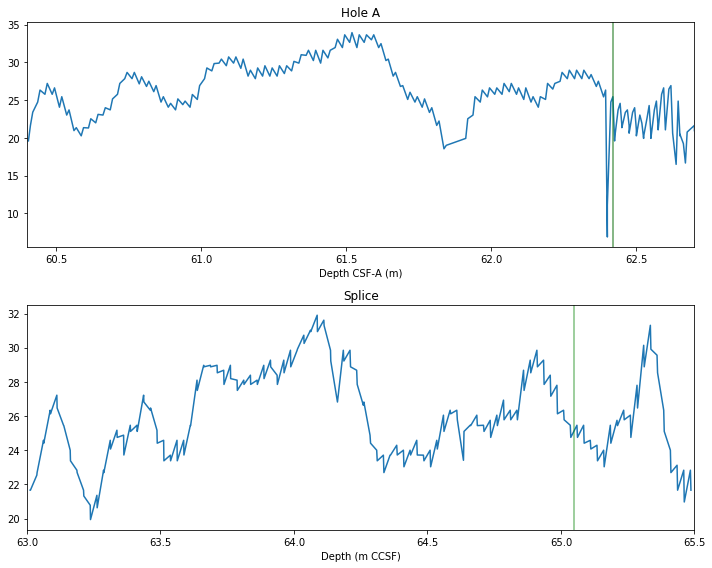

In [1174]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=60.4
x2=62.7

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(62.420,c='green',alpha=.5)

x1=63
x2=65.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(65.05,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 65.05. This sample is sketchy. Check XRF scans

In [1175]:
n=22
metadata.loc[n,[d,sc,q]]=65.05,ba,2

### 23.	361	U1474	A	8	H	2	W	69.0	64.590

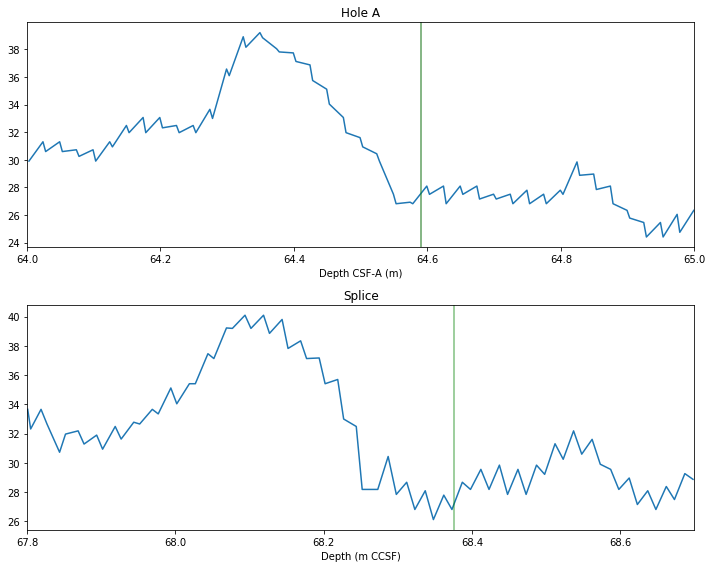

In [1176]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=64
x2=65

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(64.590,c='green',alpha=.5)

x1=67.8
x2=68.7

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(68.376,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 68.376

In [1177]:
n=23
metadata.loc[n,[d,sc,q]]=68.376,bb,4

### 24.	361	U1474	A	8	H	4	W	84.0	67.740

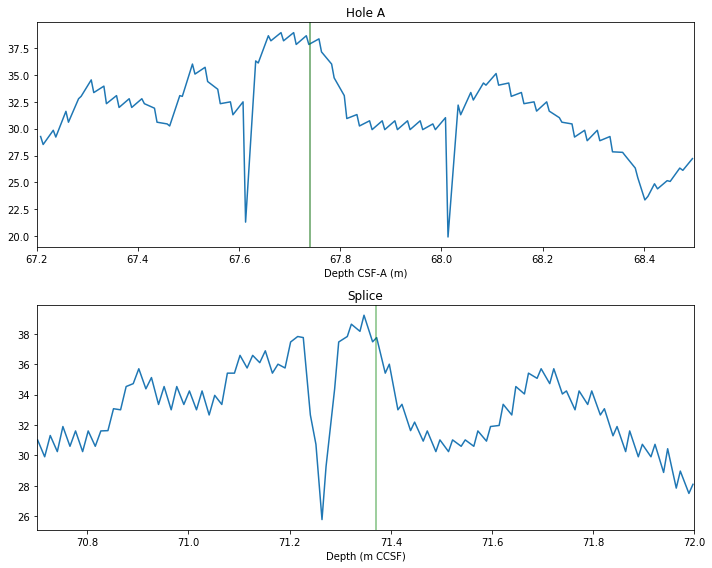

In [1374]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=67.2
x2=68.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(67.740,c='green',alpha=.5)

x1=70.7
x2=72

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(71.37,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 71.37

In [1375]:
n=24
metadata.loc[n,[d,sc,q]]=71.37,bb,4

### 25.	361	U1474	A	8	H	6	W	84.0	70.740	

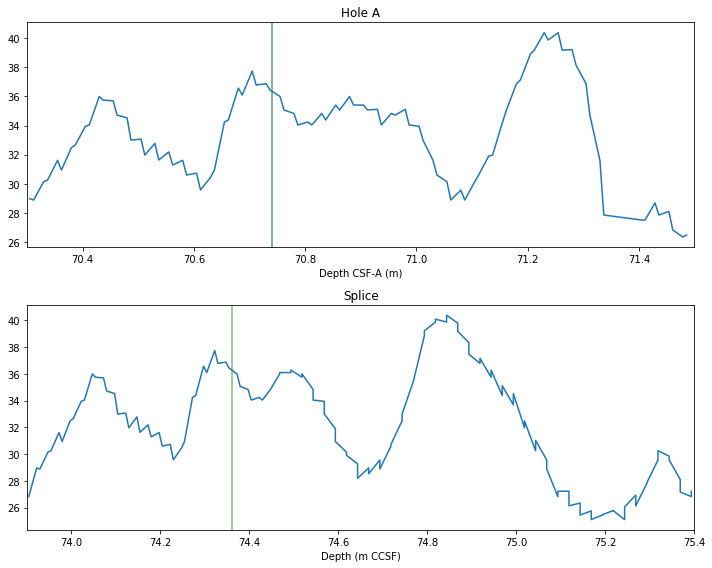

In [1180]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=70.3
x2=71.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(70.740,c='green',alpha=.5)

x1=73.9
x2=75.4

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(74.36,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 74.36

In [1181]:
n=25
metadata.loc[n,[d,sc,q]]=74.36,bb,4

### 26.	361	U1474	A	9	H	2	W	114.5	74.545	80.116

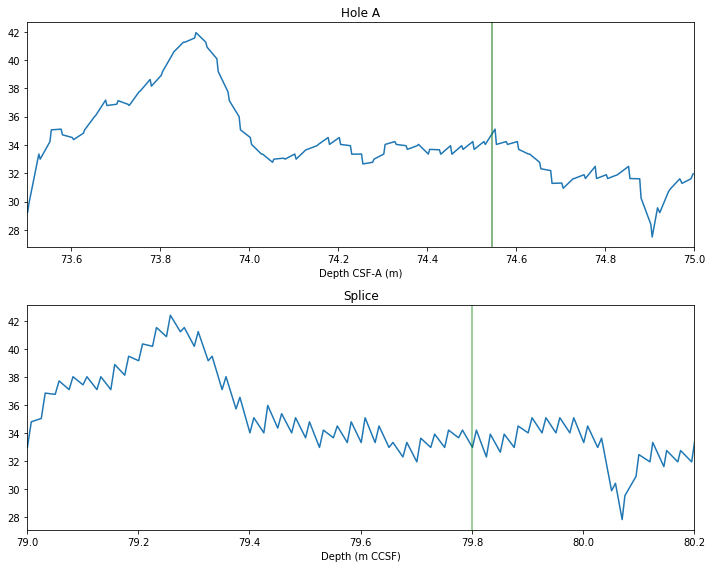

In [1340]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=73.5
x2=75

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(74.545,c='green',alpha=.5)

x1=79
x2=80.2

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(79.8,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 79.8

In [1341]:
n=26
metadata.loc[n,[d,sc,q]]=79.8,bb,3

### 27.	361	U1474	A	9	H	4	W	104.0	77.440	83.011

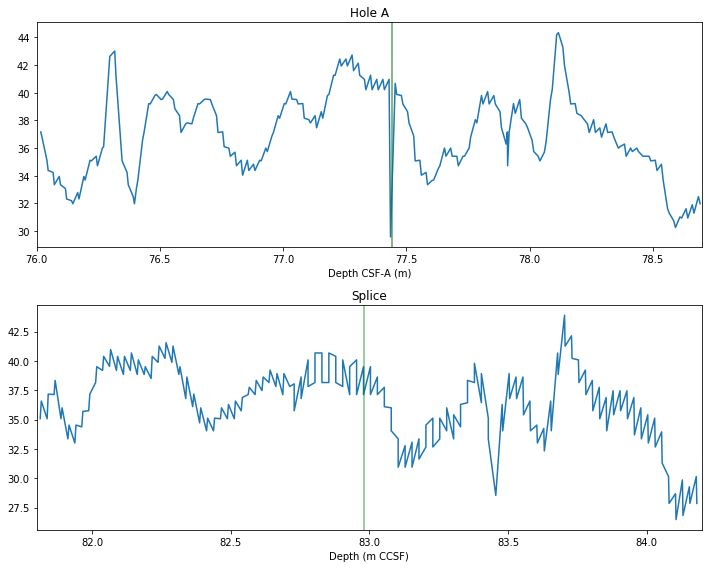

In [1184]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=76
x2=78.7

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(77.44,c='green',alpha=.5)

x1=81.8
x2=84.2

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(82.98,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 82.98

In [1185]:
n=27
metadata.loc[n,[d,sc,q]]=82.98,bb,2

### 28.	361	U1474	A	9	H	6	W	102.0	80.420	85.991

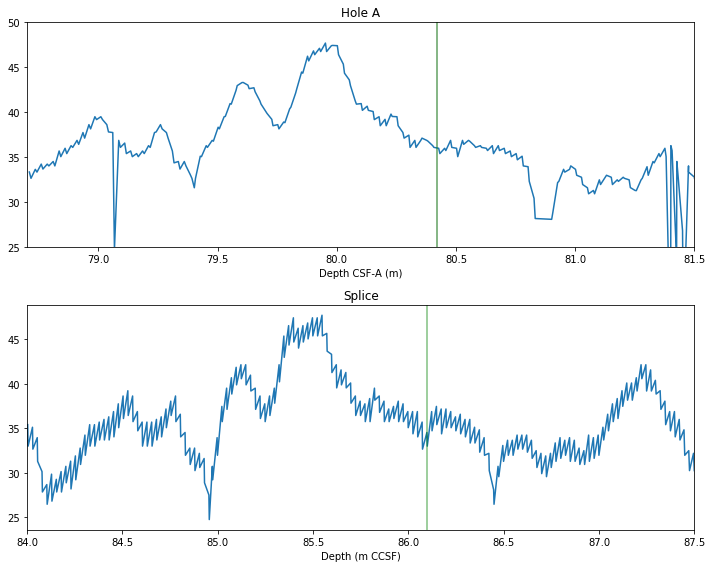

In [1186]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=78.7
x2=81.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.set_ylim(25,50)
ax.axvline(80.420,c='green',alpha=.5)

x1=84
x2=87.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(86.1,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 86.1

In [1187]:
n=28
metadata.loc[n,[d,sc,q]]=86.1,bb,4

### 29. 361	U1474	A	10	H	2	W	106	83.96

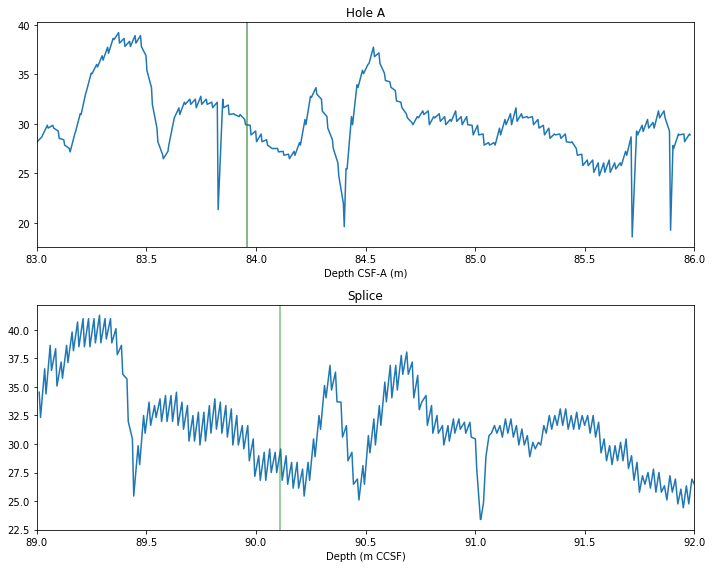

In [1188]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=83
x2=86

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(83.96,c='green',alpha=.5)

x1=89
x2=92

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(90.11,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 90.11

In [1189]:
n=29
metadata.loc[n,[d,sc,q]]=90.11,ba,3

### 30. 361	U1474	A	10	H	4	W	106	86.96

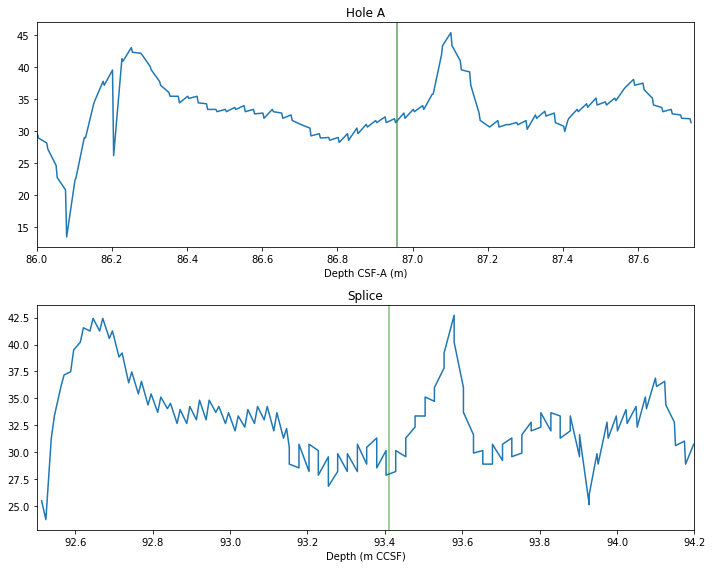

In [1337]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=86
x2=87.75

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(86.96,c='green',alpha=.5)

x1=92.5
x2=94.2

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(93.41,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 93.45

In [1338]:
n=30
metadata.loc[n,[d,sc,q]]=93.41,bb,3

### 31. 361	U1474	A	10	H	6	W	106	89.96

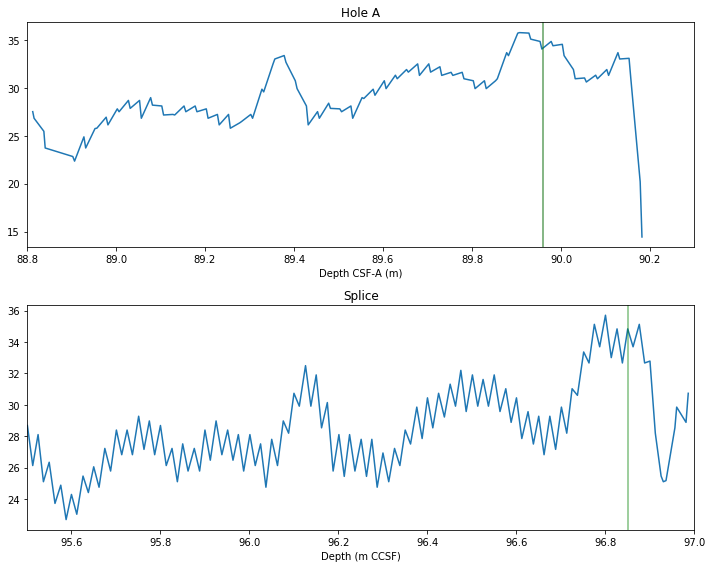

In [1392]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=88.8
x2=90.3

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(89.96,c='green',alpha=.5)

x1=95.5
x2=97

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(96.85,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 96.85

In [1193]:
n=31
metadata.loc[n,[d,sc,q]]=96.85,bb,4

### 32.	361	U1474	A	11	H	2	W	105.0	93.45	101.574	

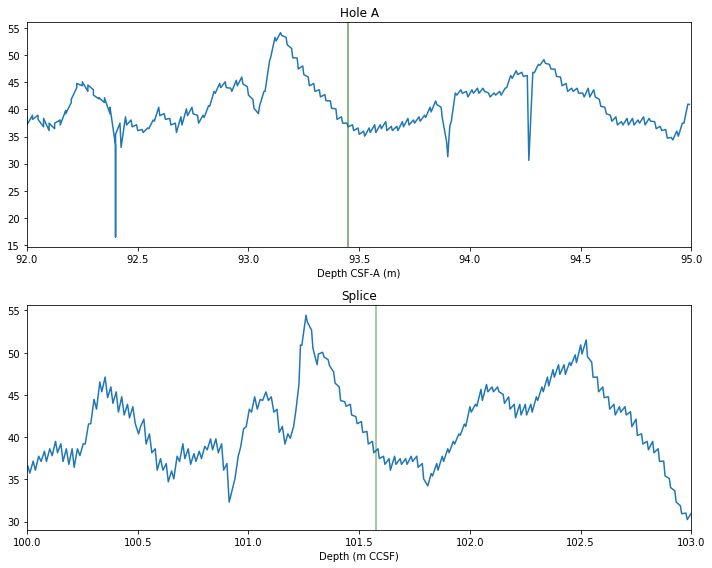

In [1194]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=92
x2=95

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(93.45,c='green',alpha=.5)

x1=100
x2=103

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(101.574,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 101.574

In [1195]:
n=32
metadata.loc[n,[d,sc,q]]=101.574,bb,4

### 33.	361	U1474	A	11	H	4	W	105.0	96.45	104.574

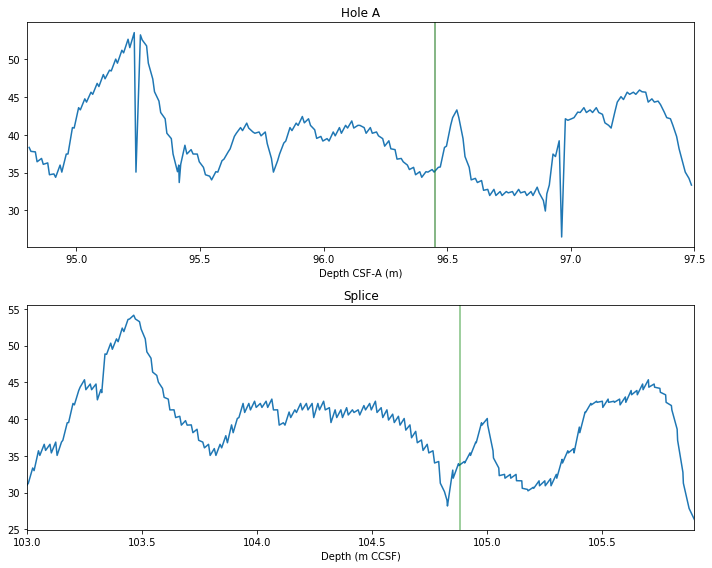

In [1196]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=94.8
x2=97.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(96.45,c='green',alpha=.5)

x1=103
x2=105.9

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(104.88,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 104.88

In [1197]:
n=33
metadata.loc[n,[d,sc,q]]=104.88,bb,4

### 34.	361	U1474	A	11	H	6	W	47.0	98.87	106.994

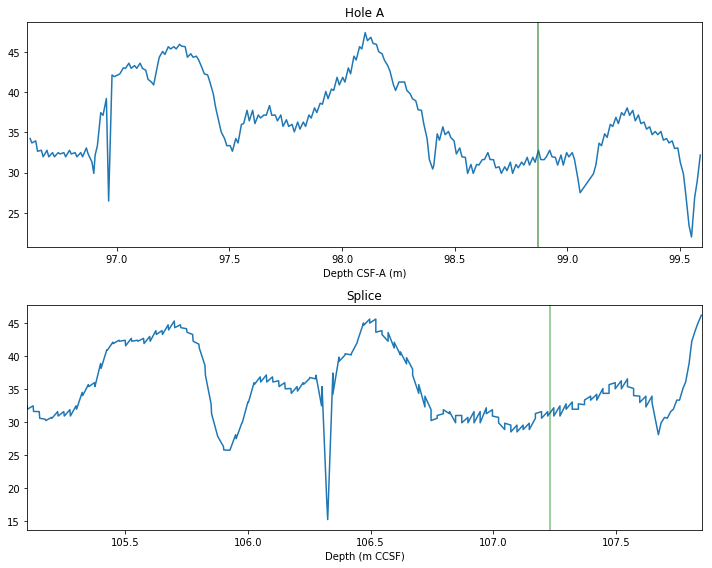

In [1288]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=96.6
x2=99.6

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(98.87,c='green',alpha=.5)

x1=105.1
x2=107.85

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(107.23,c='green',alpha=.5)

plt.tight_layout()

Splice Depth =107.372

In [1291]:
n=34
metadata.loc[n,[d,sc,q]]=107.23,bb,3

### 35.	361	U1474	A	12	H	2	W	104.0	102.95	111.156

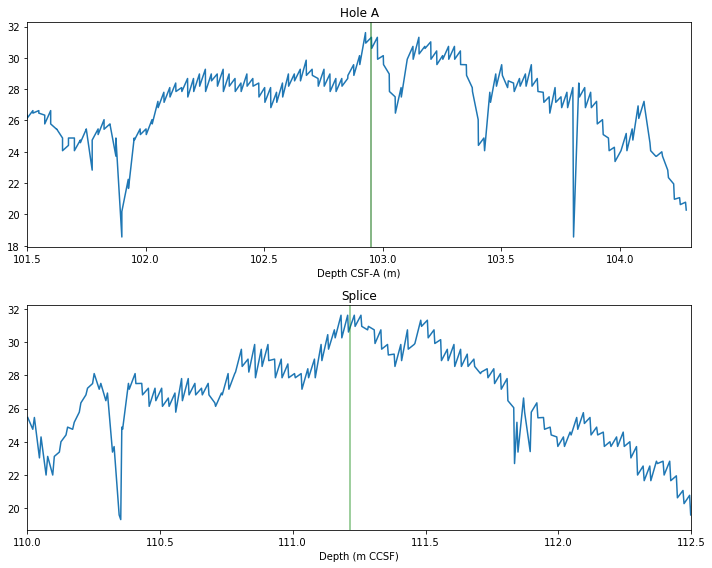

In [1200]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=101.5
x2=104.3

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(102.95,c='green',alpha=.5)

x1=110
x2=112.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(111.215,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 111.215

In [1201]:
n=35
metadata.loc[n,[d,sc,q]]=111.215,bb,4

### 36. 361	U1474	A	12	H	4	W	104	105.97

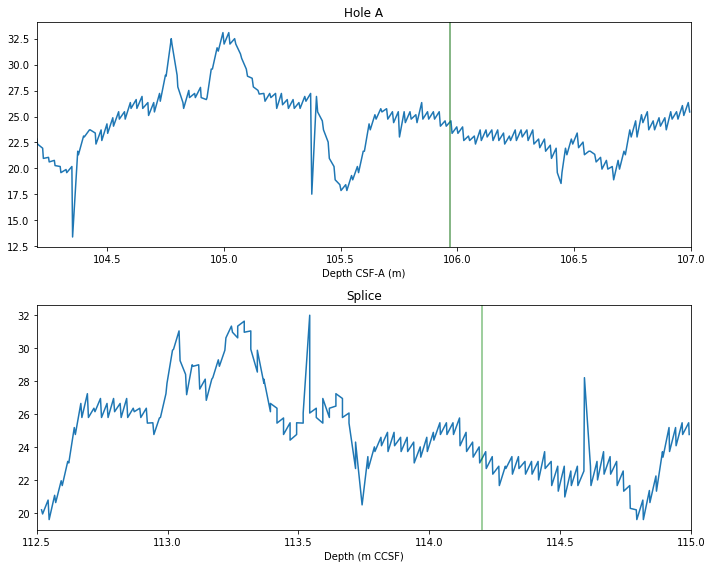

In [1202]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=104.2
x2=107

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(105.97,c='green',alpha=.5)

x1=112.5
x2=115

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(114.2,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 114.2

In [1203]:
n=36
metadata.loc[n,[d,sc,q]]=114.2,ba,3

### 37.	361	U1474	A	12	H	6	W	107.0	109.03	117.236

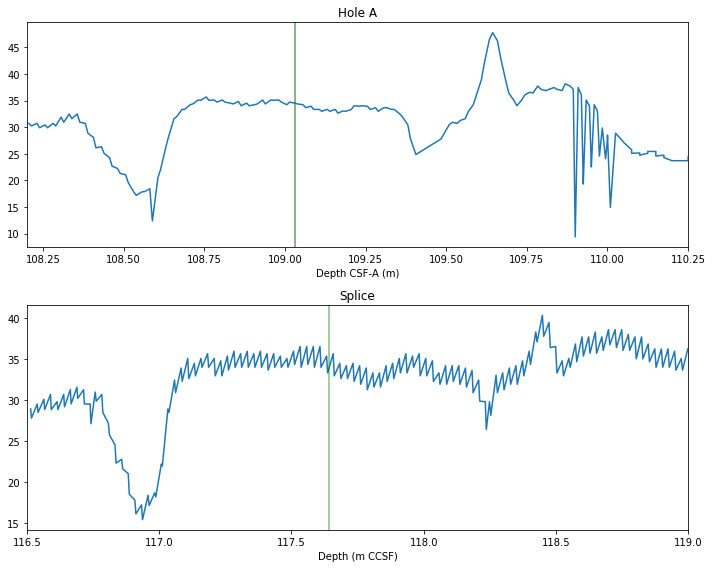

In [1204]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=108.2
x2=110.25

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(109.03,c='green',alpha=.5)

x1=116.5
x2=119

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(117.644,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 117.644

In [1205]:
n=37
metadata.loc[n,[d,sc,q]]=117.644,bb,3

### 38.	361	U1474	A	13	H	2	W	103.0	112.43	122.009

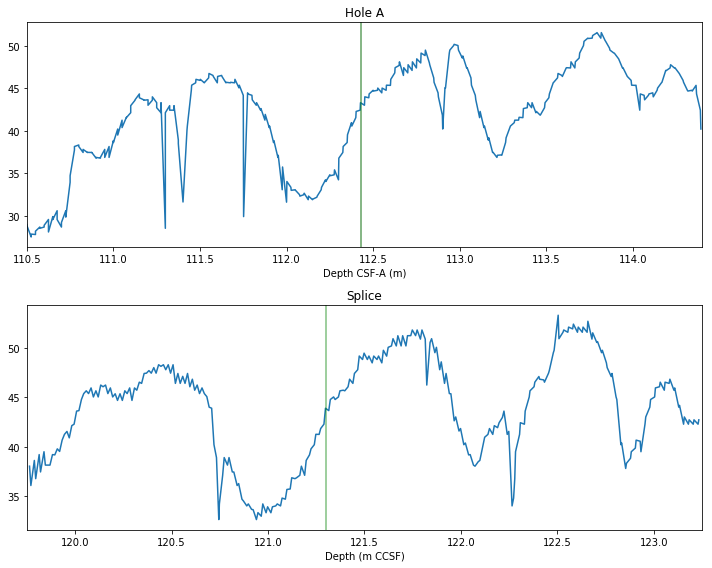

In [1206]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=110.5
x2=114.4

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(112.43,c='green',alpha=.5)

x1=119.75
x2=123.25

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(121.3,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 121.3

In [1207]:
n=38
metadata.loc[n,[d,sc,q]]=121.3,bb,4

### 39.	361	U1474	A	13	H	4	W	106.0	115.47	125.049

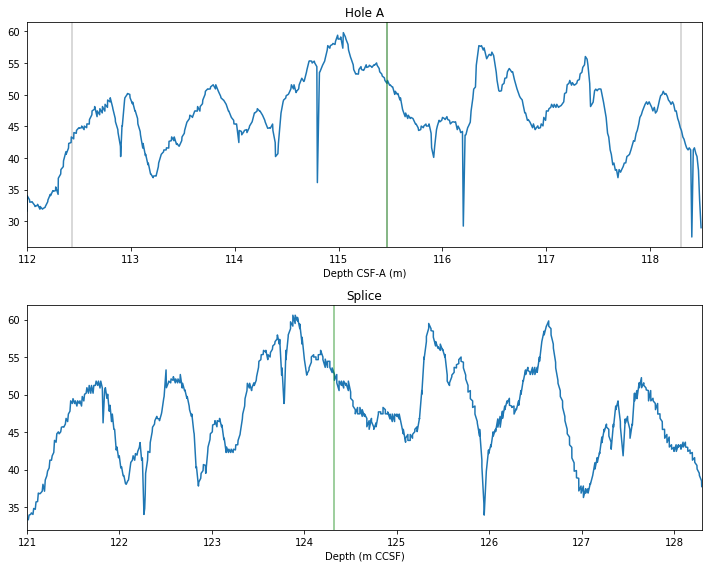

In [1208]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=112
x2=118.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(115.47,c='green',alpha=.5)

x1=121
x2=128.3

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(124.323,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 124.323

In [1209]:
n=39
metadata.loc[n,[d,sc,q]]=124.323,ba,4

### 40.	361	U1474	A	13	H	6	W	86.0	118.30	127.879

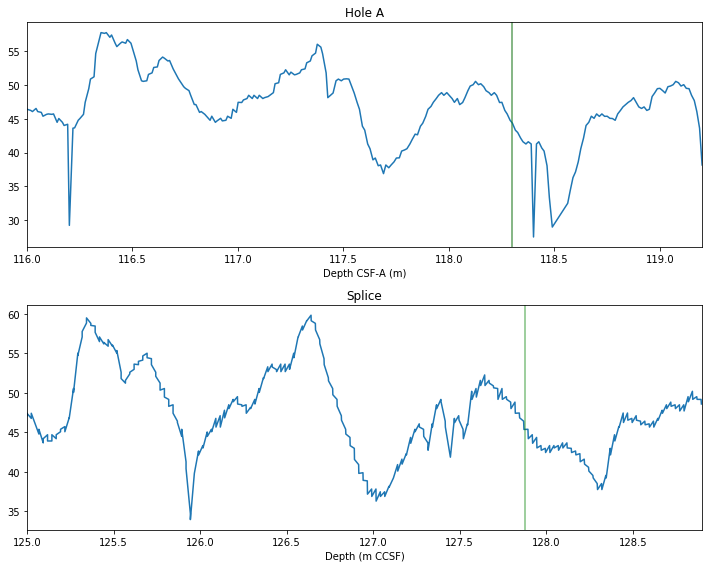

In [1210]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=116
x2=119.2

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(118.30,c='green',alpha=.5)

x1=125
x2=128.9

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(127.879,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 127.875

In [1211]:
n=40
metadata.loc[n,[d,sc,q]]=127.875,bb,3

### 41.	361	U1474	A	14	H	2	W	109.0	122.00	132.314

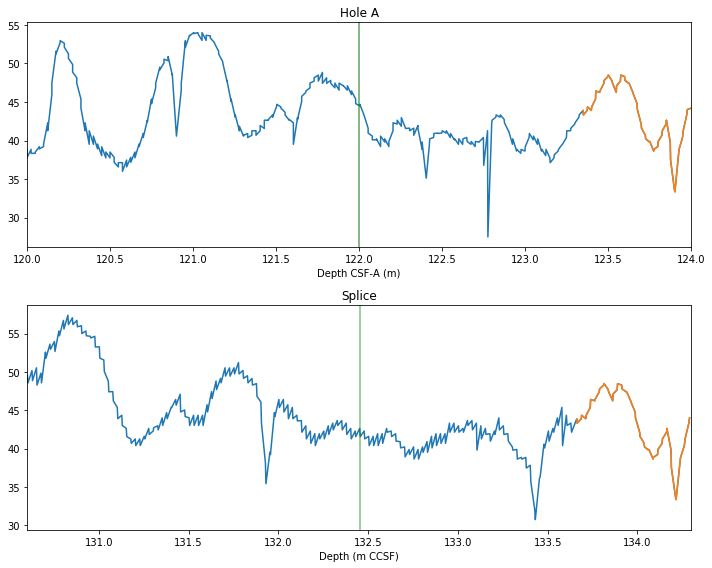

In [1212]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=120
x2=124

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(122.00,c='green',alpha=.5)

x1=130.6
x2=134.3

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(132.455,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 132.455

In [1213]:
n=41
metadata.loc[n,[d,sc,q]]=132.455,bb,2

### 42.	361	U1474	A	14	H	4	W	102.0	124.92	135.23

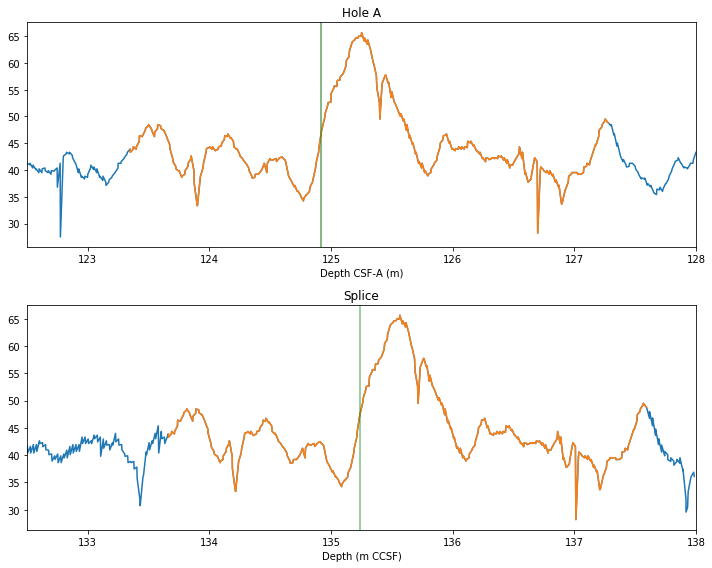

In [1214]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=122.5
x2=128

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(124.92,c='green',alpha=.5)

x1=132.5
x2=138

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(135.237,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth 135.234

In [1215]:
n=42
metadata.loc[n,[d,sc,q]]=135.234,ba,5

### 43.	361	U1474	A	14	H	6	W	113.0	128.04	138.354

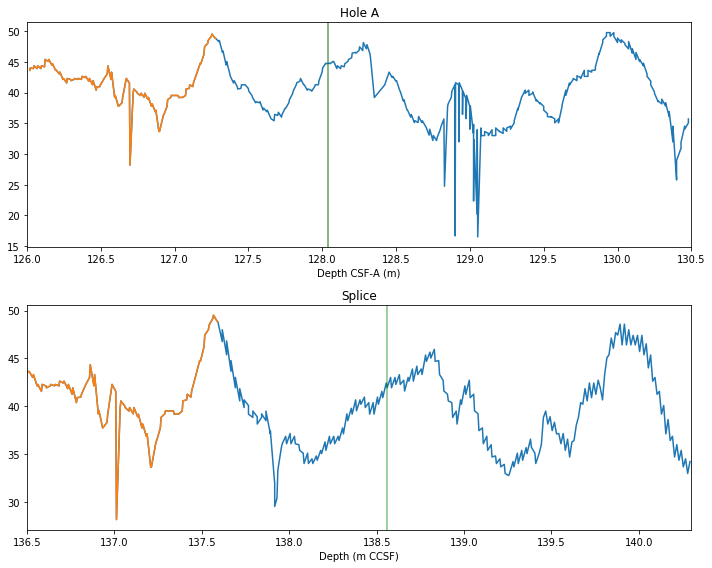

In [1298]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=126
x2=130.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(128.04,c='green',alpha=.5)

x1=136.5
x2=140.3

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(138.56,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 138.56

In [1299]:
n=43
metadata.loc[n,[d,sc,q]]=138.56,bb,4

### 44.	361	U1474	A	15	H	2	W	106.0	131.47	140.265	

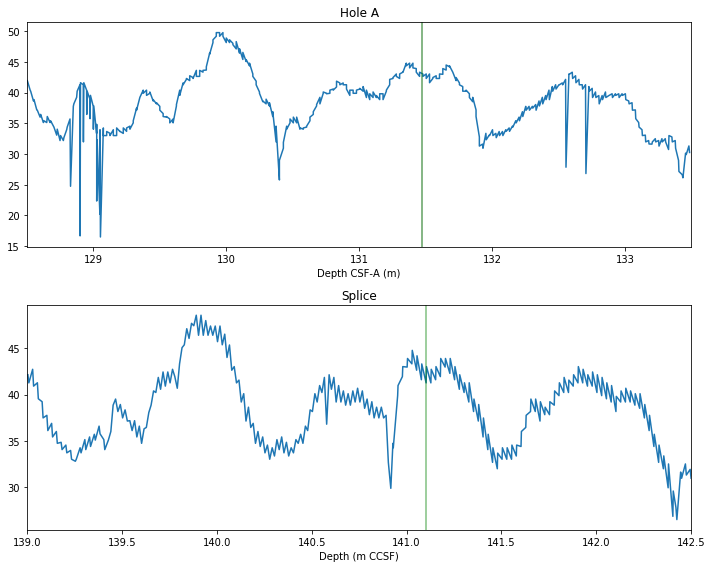

In [1218]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=128.5
x2=133.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(131.47,c='green',alpha=.5)

x1=139
x2=142.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(141.104,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 141.104

In [1219]:
n=44
metadata.loc[n,[d,sc,q]]=141.104,ba,4

### 45.	361	U1474	A	15	H	4	W	106.0	134.49	143.285

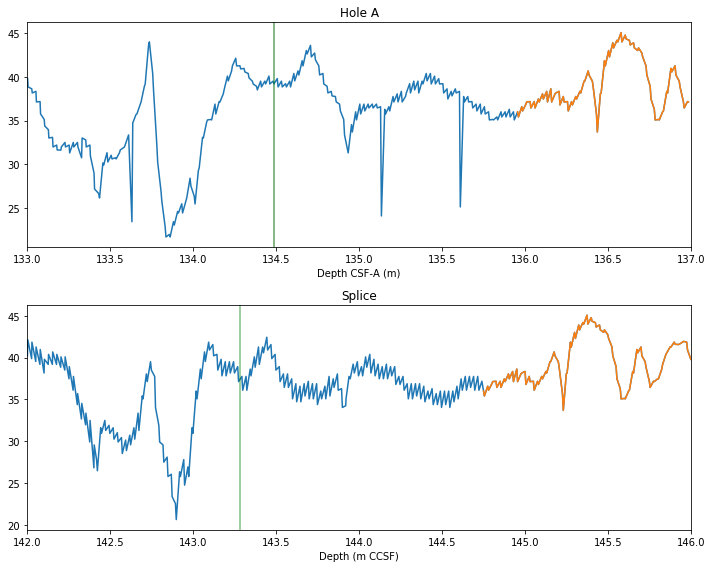

In [1220]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=133
x2=137

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(134.49,c='green',alpha=.5)

x1=142
x2=146

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(143.285,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 143.214

In [1221]:
n=45
metadata.loc[n,[d,sc,q]]=143.214,bb,4

### 46.	361	U1474	A	15	H	6	W	111.0	137.55	146.345

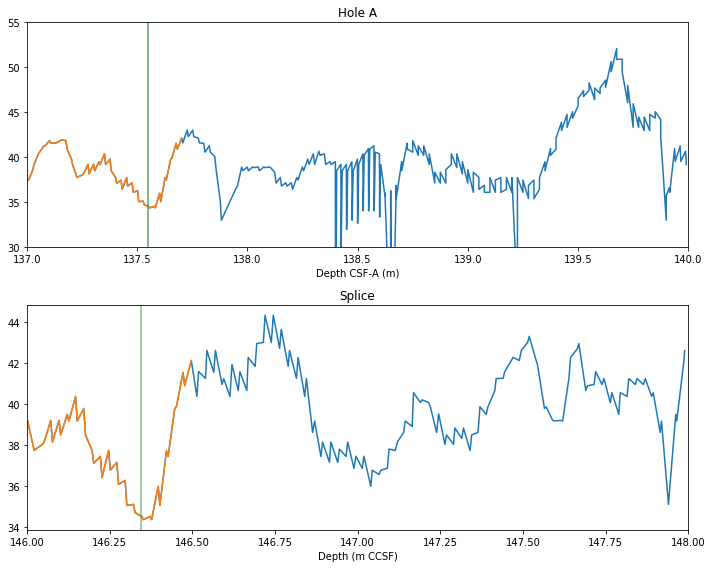

In [1222]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=137
x2=140

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(137.55,c='green',alpha=.5)
ax.set_ylim(30,55)

x1=146
x2=148

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(146.345,c='green',alpha=.5)

plt.tight_layout()

In the Splice depth = 146.345

In [1223]:
n=46
metadata.loc[n,[d,sc,q]]=146.345,bb,5

### 47.	361	U1474	A	16	H	2	W	104.0	140.94	150.512	

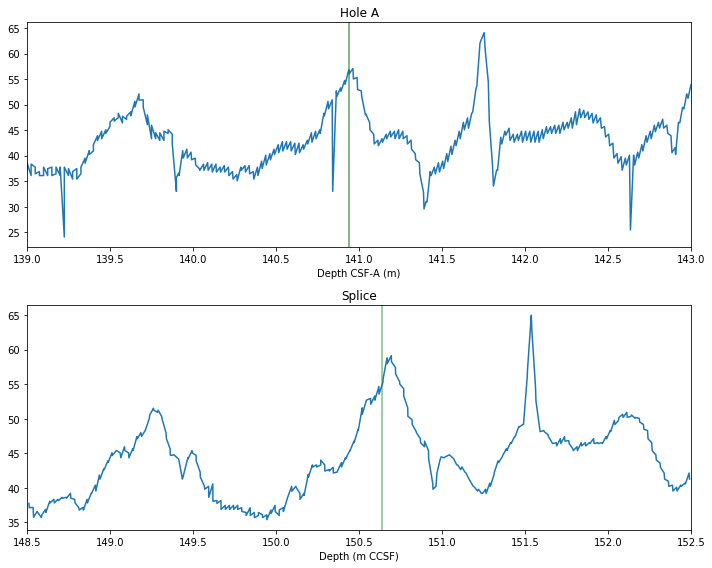

In [1327]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=139
x2=143

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(140.94,c='green',alpha=.5)

x1=148.5
x2=152.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(150.64,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 150.64

In [1328]:
n=47
metadata.loc[n,[d,sc,q]]=150.64,bb,4

### 48.	361	U1474	A	16	H	4	W	104.0	143.94	153.512

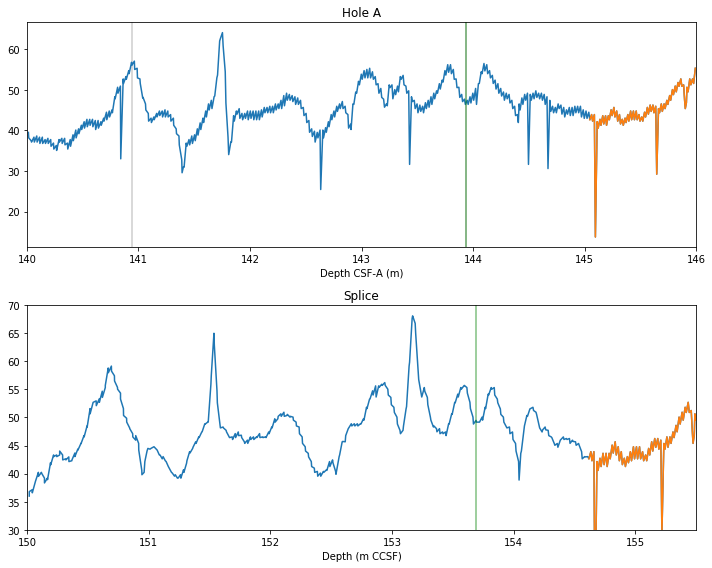

In [1226]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=140
x2=146

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(143.94,c='green',alpha=.5)

x1=150
x2=155.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(153.69,c='green',alpha=.5)
ax.set_ylim(30,70)

plt.tight_layout()

Splice Depth = 153.69

In [1227]:
n=48
metadata.loc[n,[d,sc,q]]=153.69,bb,4

### 49.	361	U1474	A	16	H	6	W	102.0	146.92	156.492

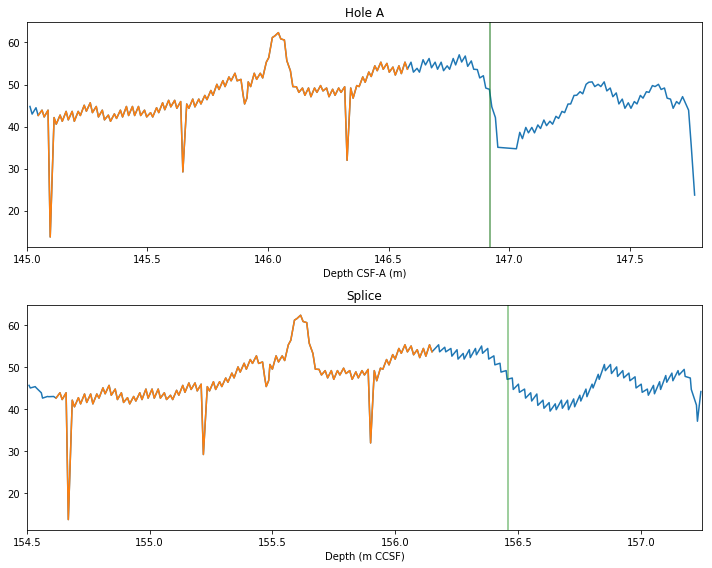

In [1228]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=145
x2=147.8

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(146.92,c='green',alpha=.5)

x1=154.5
x2=157.25

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(156.460,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 156.460

In [1229]:
n=49
metadata.loc[n,[d,sc,q]]=156.460,ba,3

### 50.	361	U1474	A	17	H	2	W	102.0	150.42	159.714

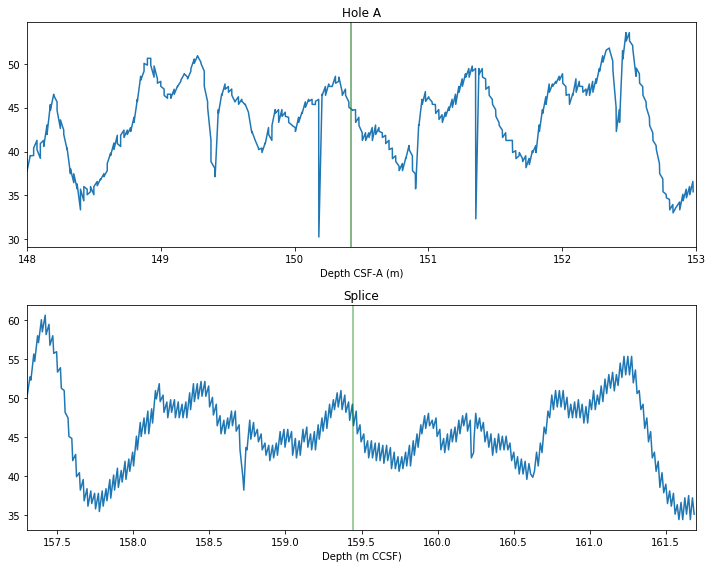

In [1230]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=148
x2=153

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(150.42,c='green',alpha=.5)

x1=157.3
x2=161.7

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(159.446,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 159.446

In [1231]:
n=50
metadata.loc[n,[d,sc,q]]=159.446,ba,4

### 51.	361	U1474	A	17	H	4	W	102.0	153.44	162.734

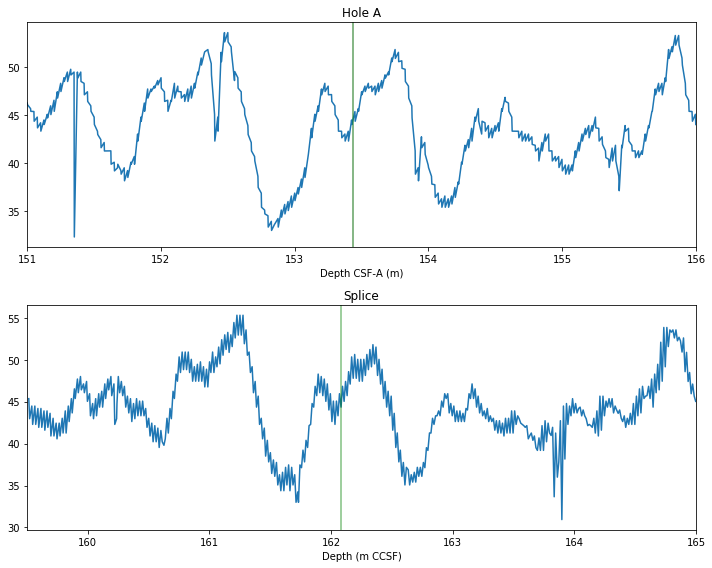

In [1232]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=151
x2=156

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(153.44,c='green',alpha=.5)

x1=159.5
x2=165

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(162.08,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 162.08

In [1233]:
n=51
metadata.loc[n,[d,sc,q]]=162.08,bb,4

### 52.	361	U1474	A	17	H	6	W	102.0	156.45	165.744

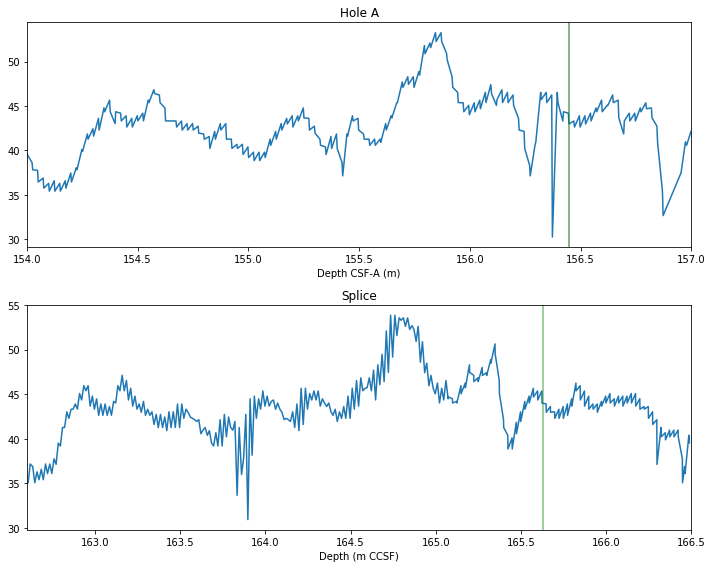

In [1316]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=154
x2=157

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(156.45,c='green',alpha=.5)

x1=162.6
x2=166.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(165.63,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 165.63

In [1317]:
n=52
metadata.loc[n,[d,sc,q]]=165.63,bb,4

### 53.	361	U1474	A	18	H	2	W	101.0	159.91	171.263

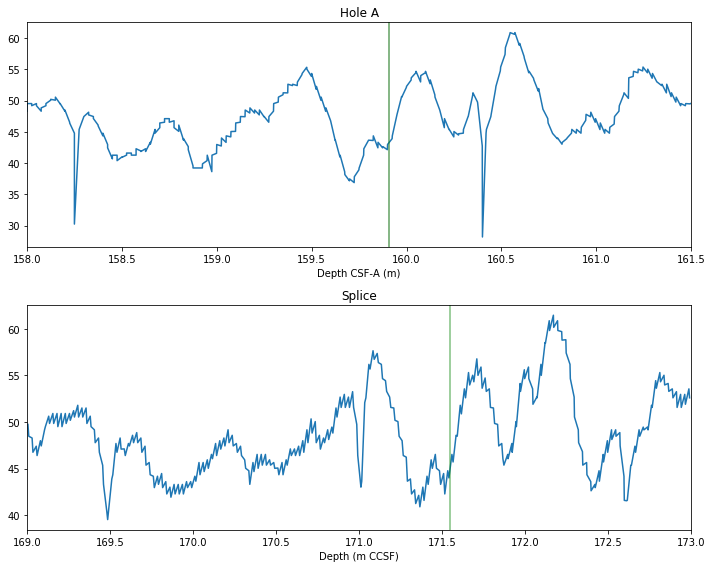

In [1343]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=158
x2=161.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(159.91,c='green',alpha=.5)

x1=169
x2=173

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(171.55,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 171.55

In [1344]:
n=53
metadata.loc[n,[d,sc,q]]=171.55,bb,4

### 54.	361	U1474	A	18	H	4	W	101.0	162.91	174.263

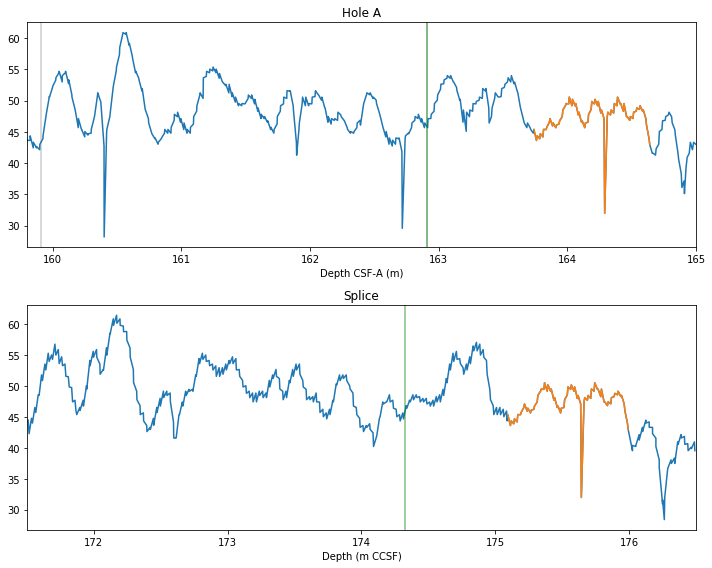

In [1238]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=159.8
x2=165

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(162.91,c='green',alpha=.5)

x1=171.5
x2=176.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(174.325,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 174.3

In [1239]:
n=54
metadata.loc[n,[d,sc,q]]=174.325,ba,3

### 55.	361	U1474	A	18	H	6	W	102.0	165.92	177.273	

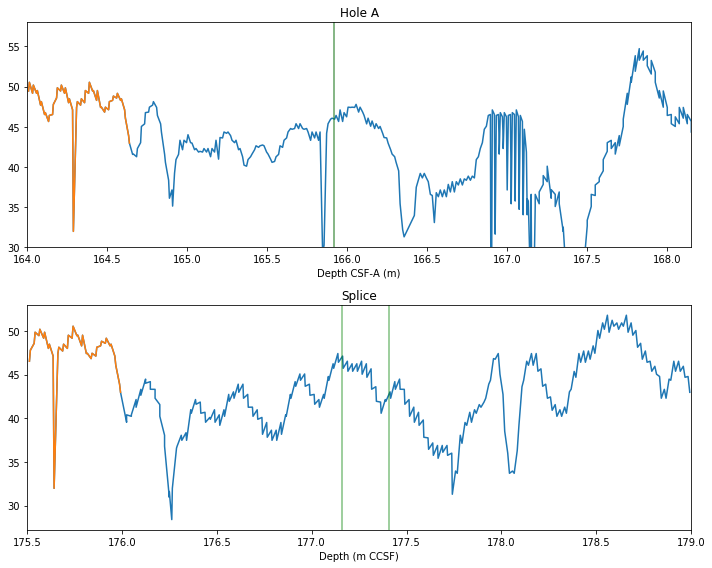

In [1240]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=164
x2=168.15

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(165.92,c='green',alpha=.5)
ax.set_ylim(30,58)

x1=175.5
x2=179

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(177.16,c='green',alpha=.5)
ax.axvline(177.407,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 177.25 or 177.407

In [1241]:
n=55
metadata.loc[n,[d,sc,q]]=177.407,bb,2

### 56.	361	U1474	A	19	H	2	W	101.0	169.41	181.209

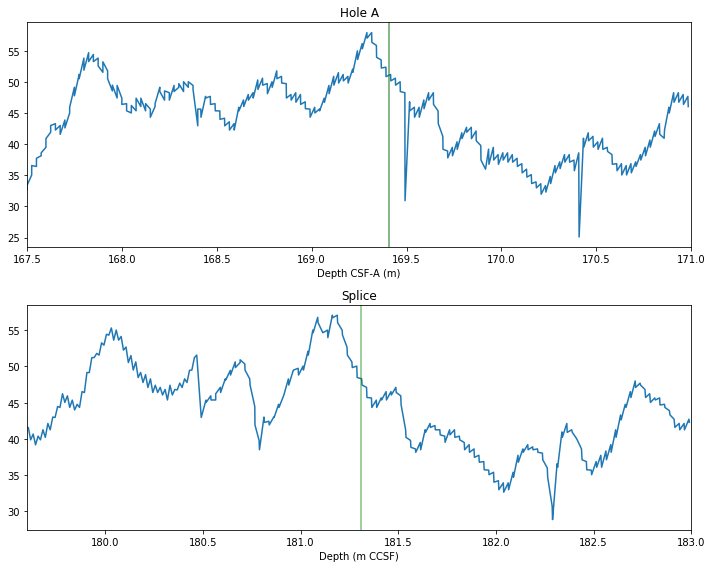

In [1271]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=167.5
x2=171

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(169.41,c='green',alpha=.5)

x1=179.6
x2=183

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(181.31,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 181.31

In [1272]:
n=56
metadata.loc[n,[d,sc,q]]=181.31,bb,4

### 57.	361	U1474	A	19	H	4	W	100.0	172.42	184.219

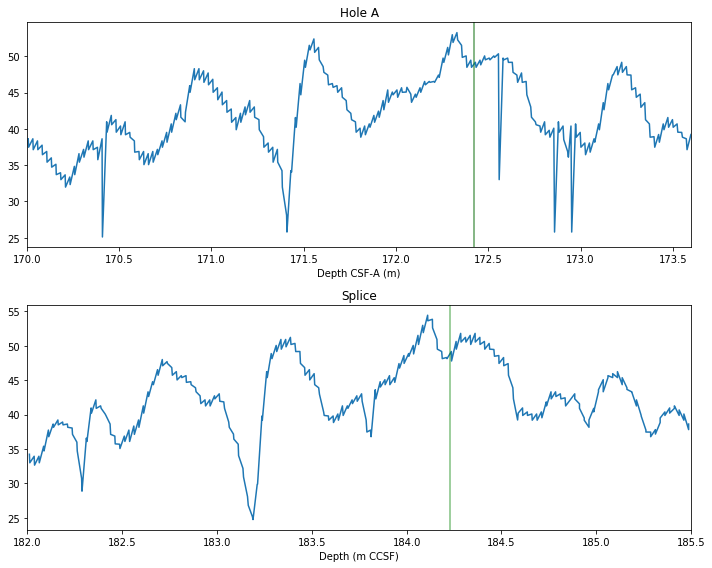

In [1379]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=170
x2=173.6

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(172.42,c='green',alpha=.5)

x1=182
x2=185.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(184.219,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 184.219

In [1246]:
n=57
metadata.loc[n,[d,sc,q]]=184.219,bb,4

### 58.	361	U1474	A	19	H	6	W	101.0	175.45	187.249

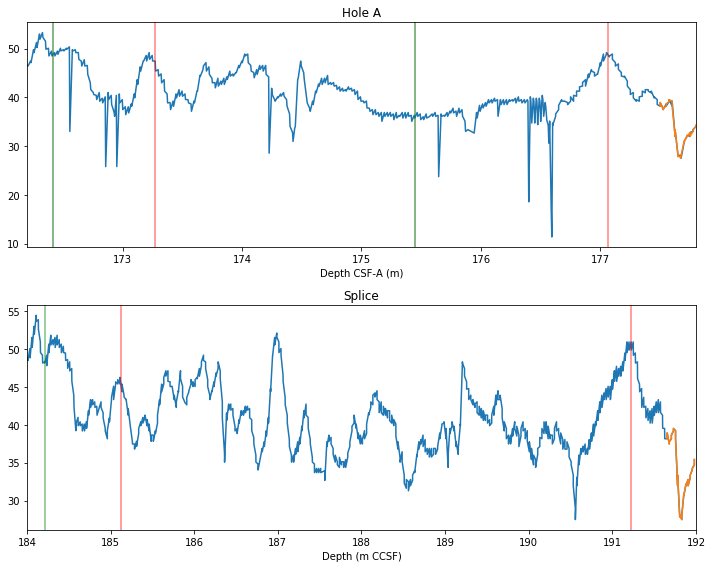

In [1247]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=172.2
x2=177.8

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(172.42,c='green',alpha=.5)
ax.axvline(173.273,c='red',alpha=.5)

ax.axvline(175.45,c='green',alpha=.5)
ax.axvline(177.06,c='red',alpha=.5)

x1=184
x2=192

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(184.219,c='green',alpha=.5)
ax.axvline(185.123,c='red',alpha=.5)
# ax.axvline(187.249,c='green',alpha=.5)
ax.axvline(191.223,c='red',alpha=.5)

plt.tight_layout()

No luck here. Worst one yet. I'll just go with the recommended depth.

In [1248]:
n=58
metadata.loc[n,[d,sc,q]]=187.249,bb,1

### 59.	361	U1474	A	20	H	2	W	96.0	178.86	193.015

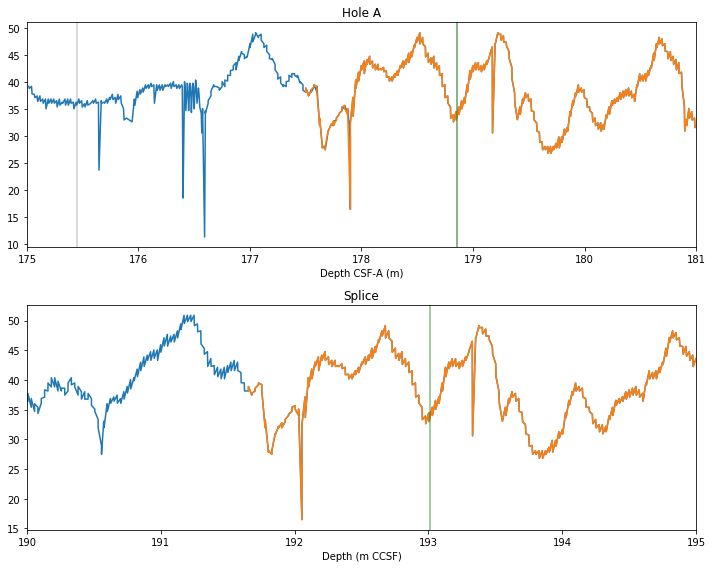

In [1060]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=175
x2=181

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(178.86,c='green',alpha=.5)

x1=190
x2=195

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(193.015,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 193.015

In [1249]:
n=59
metadata.loc[n,[d,sc,q]]=193.015,ba,5

### 60.	361	U1474	A	20	H	4	W	97.0	181.87	196.025

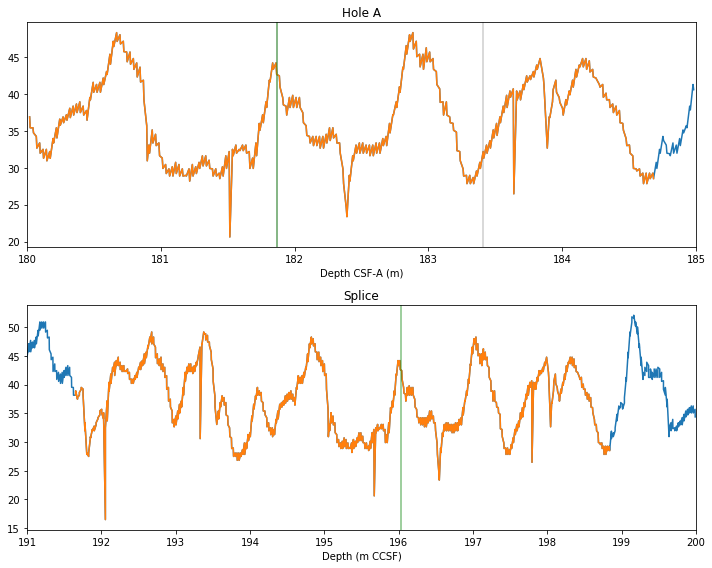

In [1250]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=180
x2=185

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(181.87,c='green',alpha=.5)

x1=191
x2=200

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(196.025,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 196.025

In [1251]:
n=60
metadata.loc[n,[d,sc,q]]=196.025,ba,5

### 61.	361	U1474	A	20	H	5	W	102.0	183.41	197.565

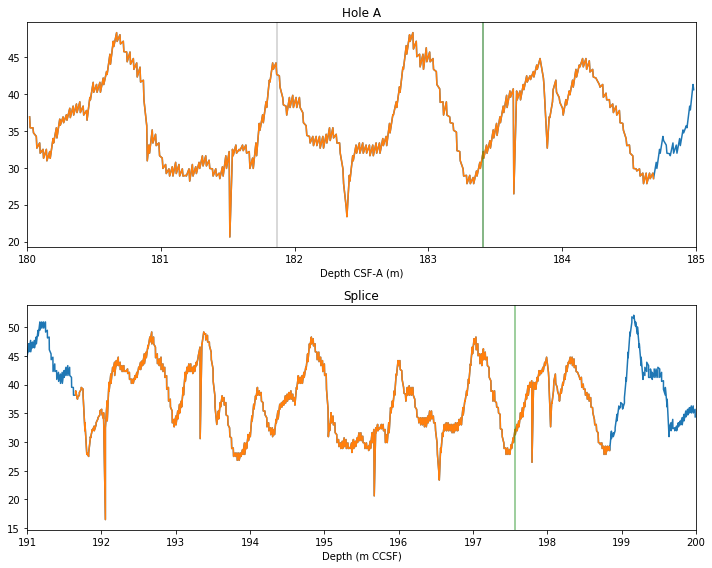

In [1252]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=180
x2=185

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(183.41,c='green',alpha=.5)

x1=191
x2=200

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(197.565,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 197.565

In [1253]:
n=61
metadata.loc[n,[d,sc,q]]=197.565,ba,5

### 62. 361 U1474	A	21	H	2	W	106	188.46 &  65. 361	U1474	A	22	H	2	W	102	197.92

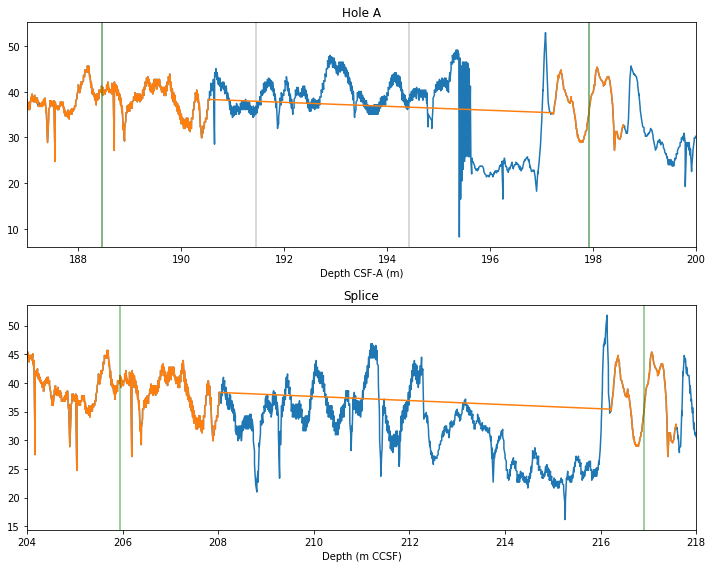

In [1254]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=187
x2=200

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(188.46,c='green',alpha=.5)
ax.axvline(197.92,c='green',alpha=.5)

x1=204
x2=218

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(205.957,c='green',alpha=.5)
ax.axvline(216.915,c='green',alpha=.5)

plt.tight_layout()

Both of these are in the splice. Depth = 205.957 & 216.915

In [1255]:
n=62
metadata.loc[n,[d,sc,q]]=205.957,ba,5
n=65
metadata.loc[n,[d,sc,q]]=216.915,ba,5

### 71.	361	U1474	A	24	H	4	W	110.0	219.97	239.154	

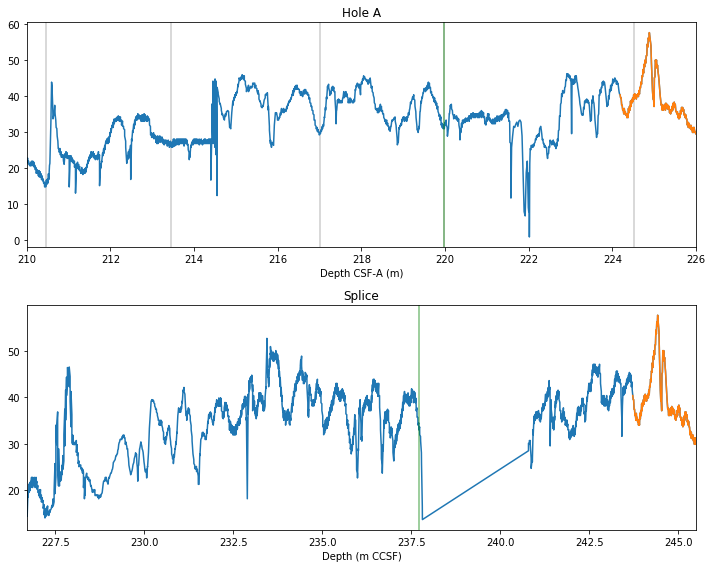

In [1256]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=210
x2=226

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(219.97,c='green',alpha=.5)

x1=226.7
x2=245.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(237.73,c='green',alpha=.5)

plt.tight_layout()

The closest Depth it could be is the end of F28F4, 237.73

In [1257]:
n=71
metadata.loc[n,[d,sc,q]]=237.73,ba,3

### 72.	361	U1474	A	25	H	2	W	102.0	224.510	244.048

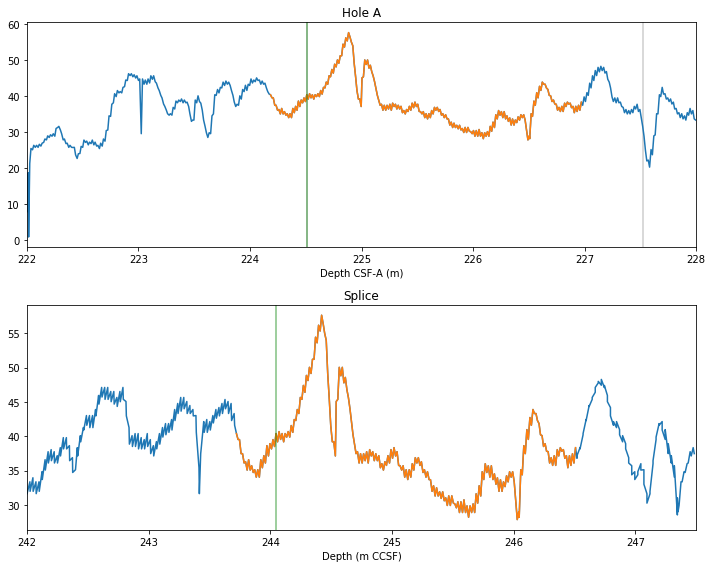

In [1258]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=222
x2=228

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(224.51,c='green',alpha=.5)

x1=242
x2=247.5

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(244.048,c='green',alpha=.5)

plt.tight_layout()

In the splice. Depth = 244.048 m

In [1259]:
n=72
metadata.loc[n,[d,sc,q]]=244.048,ba,5

### 73.	361	U1474	A	25	H	4	W	102.0	227.520	247.058

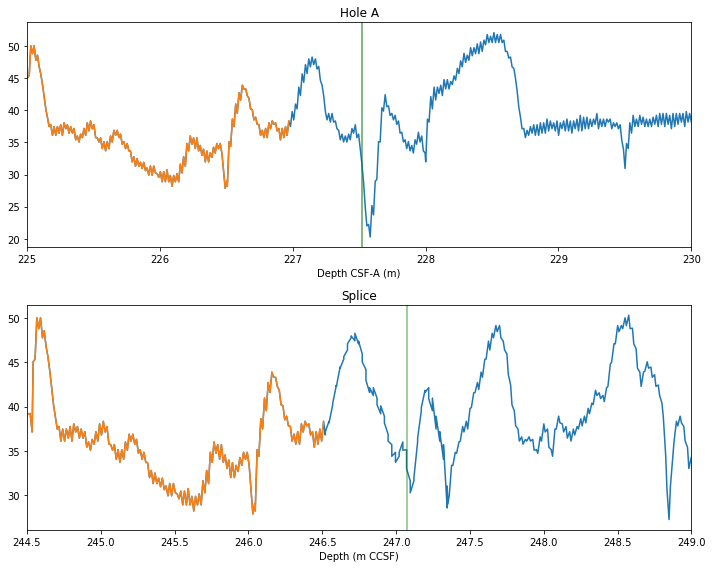

In [1260]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=225
x2=230

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(227.52,c='green',alpha=.5)

x1=244.5
x2=249

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(247.074,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 247.074

In [1261]:
n=73
metadata.loc[n,[d,sc,q]]=247.074,ba,4

# Final Table

In [1433]:
metadata['Correlation Quality']=metadata['Correlation Quality'].astype(int)
metadata

Exp   Site Hole  Core Type  Sect A/W  Offset (cm)  Depth CSF-A (m)  \
#                                                                        
1   361  U1474    A     1    H     1   W         92.0            0.920   
2   361  U1474    A     1    H     3   W         57.0            3.570   
3   361  U1474    A     2    H     1   W        129.0            6.690   
4   361  U1474    A     2    H     3   W         51.0            8.910   
5   361  U1474    A     2    H     5   W         20.0           11.600   
6   361  U1474    A     2    H     7   W         22.5           14.335   
7   361  U1474    A     3    H     1   W         76.0           15.660   
8   361  U1474    A     3    H     3   W         76.0           18.660   
9   361  U1474    A     3    H     5   W         76.0           21.660   
10  361  U1474    A     3    H     7   W         30.0           23.700   
11  361  U1474    A     4    H     2   A         84.0           26.740   
12  361  U1474    A     4    H     4   W        113.0           30.030   
13  361  U1474    A     4    H     7   W         33.0           33.730   
14  361  U1474    A     5    H     1   W         84.0           34.740   
15  361  U1474    A     5    H     3   W         84.0           37.740   
16  361  U1474    A     5    H     5   W         23.0           40.130   
17  361  U1474    A     6    H     2   W         77.0           45.670   
18  361  U1474    A     6    H     5   W         84.0           50.240   
19  361  U1474    A     6    H     7   W         54.0           52.940   
20  361  U1474    A     7    H     3   W         54.0           56.440   
21  361  U1474    A     7    H     5   W         93.5           59.835   
22  361  U1474    A     7    H     7   W         52.0           62.420   
23  361  U1474    A     8    H     2   W         69.0           64.590   
24  361  U1474    A     8    H     4   W         84.0           67.740   
25  361  U1474    A     8    H     6   W         84.0           70.740   
26  361  U1474    A     9    H     2   W        114.5           74.545   
27  361  U1474    A     9    H     4   W        104.0           77.440   
28  361  U1474    A     9    H     6   W        102.0           80.420   
29  361  U1474    A    10    H     2   W        106.0           83.960   
30  361  U1474    A    10    H     4   W        106.0           86.960   
..  ...    ...  ...   ...  ...   ...  ..          ...              ...   
37  361  U1474    A    12    H     6   W        107.0          109.030   
38  361  U1474    A    13    H     2   W        103.0          112.430   
39  361  U1474    A    13    H     4   W        106.0          115.470   
40  361  U1474    A    13    H     6   W         86.0          118.300   
41  361  U1474    A    14    H     2   W        109.0          122.000   
42  361  U1474    A    14    H     4   W        102.0          124.920   
43  361  U1474    A    14    H     6   W        113.0          128.040   
44  361  U1474    A    15    H     2   W        106.0          131.470   
45  361  U1474    A    15    H     4   W        106.0          134.490   
46  361  U1474    A    15    H     6   W        111.0          137.550   
47  361  U1474    A    16    H     2   W        104.0          140.940   
48  361  U1474    A    16    H     4   W        104.0          143.940   
49  361  U1474    A    16    H     6   W        102.0          146.920   
50  361  U1474    A    17    H     2   W        102.0          150.420   
51  361  U1474    A    17    H     4   W        102.0          153.440   
52  361  U1474    A    17    H     6   W        102.0          156.450   
53  361  U1474    A    18    H     2   W        101.0          159.910   
54  361  U1474    A    18    H     4   W        101.0          162.910   
55  361  U1474    A    18    H     6   W        102.0          165.920   
56  361  U1474    A    19    H     2   W        101.0          169.410   
57  361  U1474    A    19    H     4   W        100.0          172.420   
58  361 

In [1434]:
metadata.to_csv(ppl_path+'madSamplesMetadata.csv')